# Census Income

### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


### The prediction task is to determine whether a person makes over $50K a year.

In [1]:
url="https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"

### Importing Libraries

In [2]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

##### Importing Dataset

In [3]:
df=pd.read_csv(url)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


- So here we can observe that the dataset contains the details of the annual income of the persons .
- In the dataset "Income" is the target variable which seems to be having 2 classes so it will be termed to be a "Classification Problem" where we need to predict whether the income of the person is over $50k per year or not .
- The dataset contains both numerical and categorical columns.

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.shape

(32560, 15)

- The dataset contains 32560 rows and 15 columns .

Out of 15 columns 14 are independent features and remaining 1 is our target column that is 'Income'

# Exploratory Data Analysis(EDA)

In [7]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## checking null values

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- There is no missing values present in the dataset and data is cleaned.

### let's visualize the null values clearly

<AxesSubplot:>

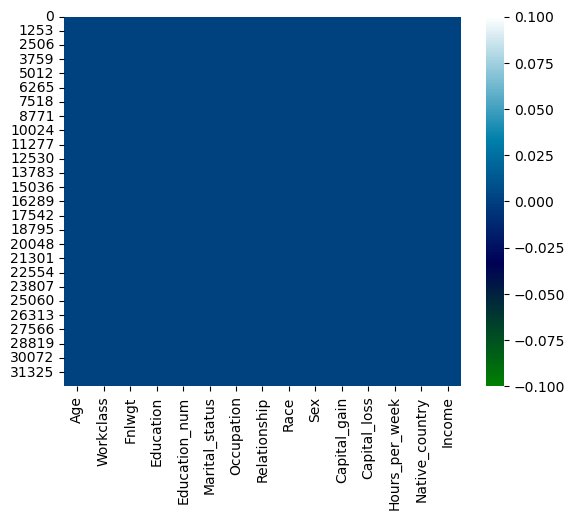

In [10]:
sns.heatmap(df.isnull(),cmap='ocean')

no missing value highlighted visually

<AxesSubplot:>

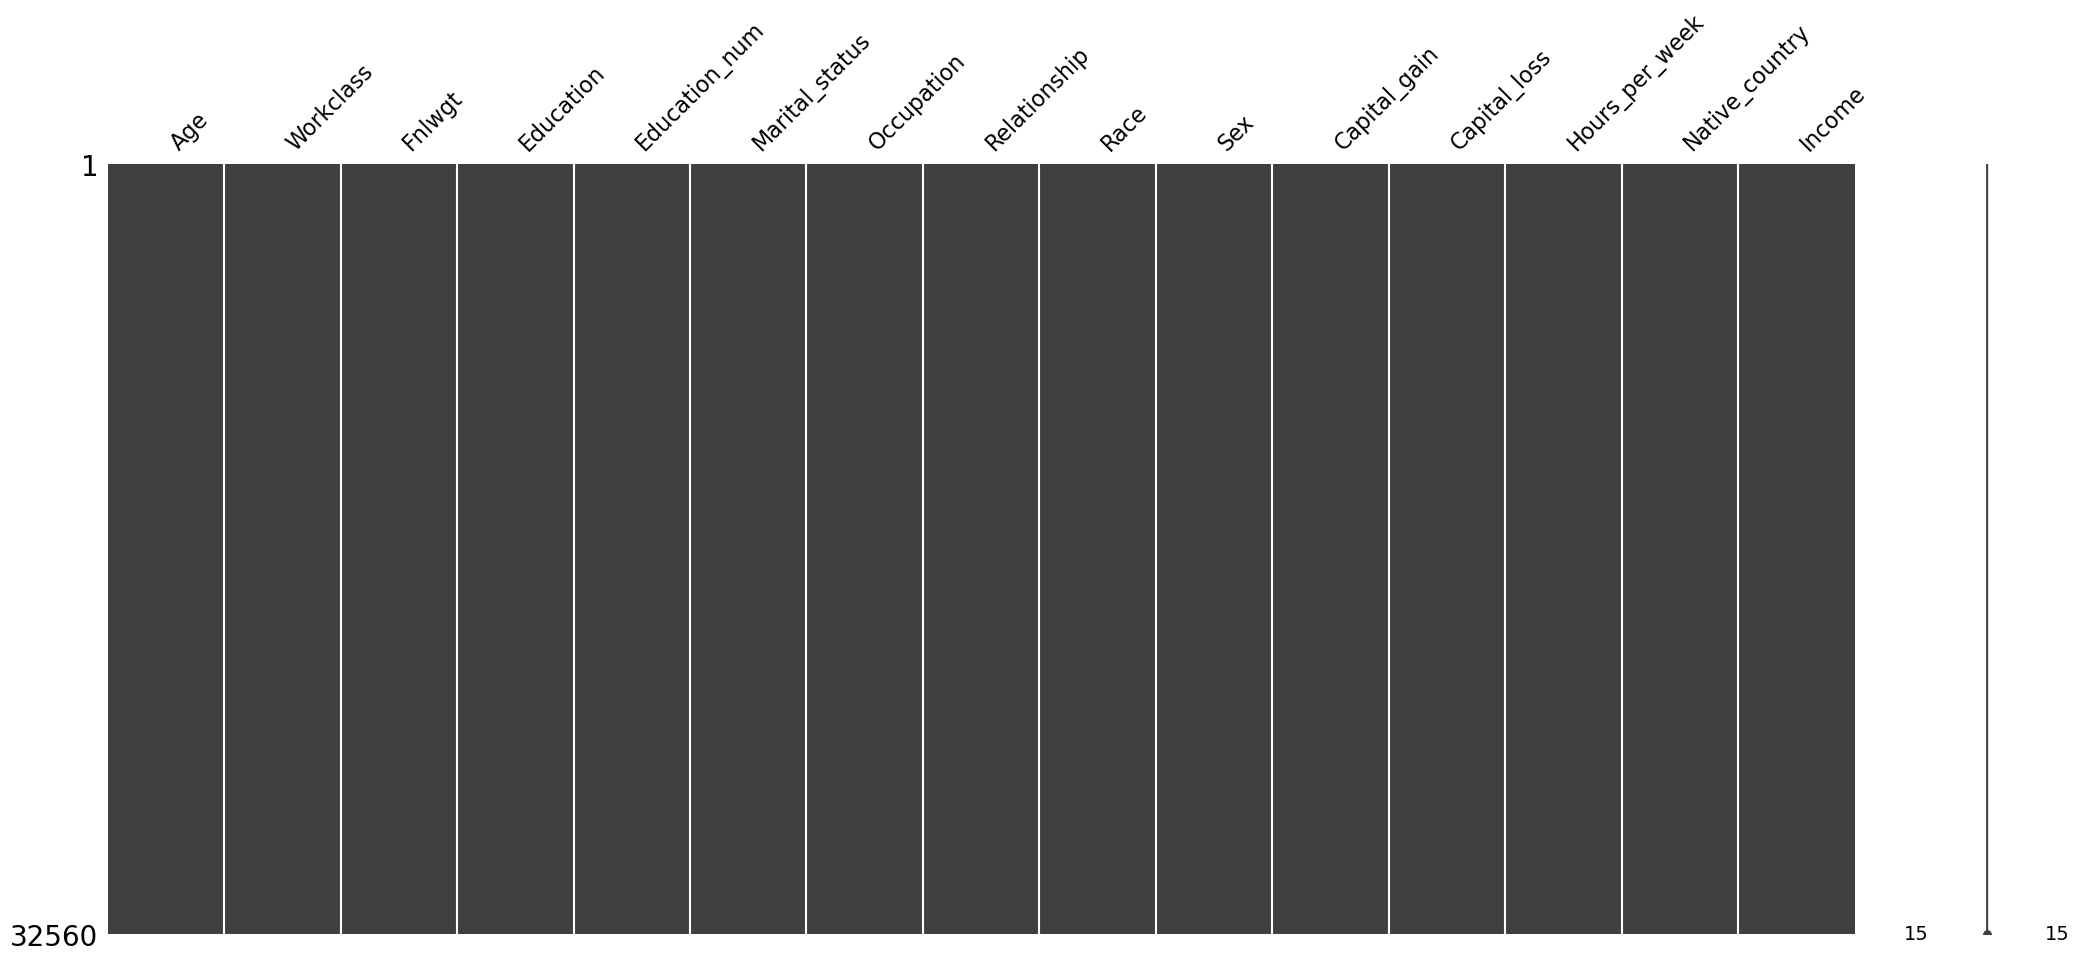

In [11]:
ms.matrix(df)

no missing value highlighted visually

### checking unique values

In [12]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

finalweight is 21647 unique values out of 32560 values

# Value Count Function

Let's check the list of value counts in each columns to find if there are any unexpected or corrupted entries in the dataset.

In [13]:
for i in df.columns:
    print(df[i].value_counts())
    print('-'*60)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
------------------------------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
------------------------------------------------------------
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
------------------------------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-

As we seen that there is "?" mark is present in the data set. lets replace it.

- Here the columns capital gain and capital loss have more than 90% of zeroes and it is not required for our prediction. Let's drop them

In [14]:
# droping the columns having more number of 0's
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

### finding "?" mark

In [15]:
(df == ' ?').sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

**<u>From above output<u>**

- Now, we can see Column 'Workclass' contains 1836 ' ?' values, Column 'Occupation' contains 1843 ' ?' values and Column 'Native_country' contains 583 ' ?' values. 
- So, we will convert these values into null value by replacing these with 'nan' to handle these 'null' values

### Replacing "?" mark

In [16]:
df.replace({' ?':np.nan},inplace=True)

#### Checking Null value again

In [17]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

### Lets handle Null value categorial column

In [18]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [19]:
df['Workclass'].mode()

0     Private
Name: Workclass, dtype: object

"private" is our replacement value out of other values

In [20]:
#Replacing Value with mode
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)

In [21]:
df['Occupation'].mode()

0     Prof-specialty
Name: Occupation, dtype: object

"Prof-specialty"  is our replacement value

In [22]:
#Replacing Value with mode
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)

In [23]:
df['Native_country'].mode()

0     United-States
Name: Native_country, dtype: object

In [24]:
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

### Checking again whether all the columns have changed into no Null values

In [25]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null value present in the dataset

In [26]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

- We can notice there are no  '? ' sign in these columns means we have filled them.

### - Most of the columns have unique type of classes, let's replace them with the new classes.

In [27]:
df["Education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [28]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],' School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors'],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],' Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

In [29]:
df["Education"].value_counts()

 High-School         11077
 Secondary-School     9740
 Under_Graduation     5354
 School               4253
 Post_Graduation      1723
 PhD                   413
Name: Education, dtype: int64

In [30]:
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov' ],' Govt-Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc' ],' Pvt-Sector')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')

In [31]:
df["Workclass"].value_counts()

 Pvt-Sector     28189
 Govt-Sector     4350
Not-working        21
Name: Workclass, dtype: int64

In [32]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Divorced')

In [33]:
df["Marital_status"].value_counts()

 Married     14999
 Single      10682
 Divorced     6879
Name: Marital_status, dtype: int64

- Now we have replaced the unique types classes in the columns Workclass, Education and Marital_status.

In [34]:
# let's check the dataframe
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-Sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-Sector,215646,High-School,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-Sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-Sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-Sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [35]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
32555,27,Pvt-Sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Pvt-Sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Pvt-Sector,151910,High-School,9,Divorced,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Pvt-Sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K
32559,52,Pvt-Sector,287927,High-School,9,Married,Exec-managerial,Wife,White,Female,40,United-States,>50K


In [36]:
# checking the list of value counts in Income
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

- There are two unique values in the target columns <=50k and >50k.

We can say that whether the person has annual income <=50k or >50k 

We can also observe that the class imbalancing issue here so will balance the data using SMOTE before machine learning modeling.

In [37]:
# checking wheather the dataset contains any space
df.loc[df['Income']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


- It seems that there are no spaces in the dataset.

## find duplicate values

In [38]:
df.duplicated().sum()

29

there are 29 duplicated value presented in the dataset. lets remove them.

### Removing duplicated values

In [39]:
duplicate = df[df.duplicated()]

print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
4880,25,Pvt-Sector,308144,Under_Graduation,13,Single,Craft-repair,Not-in-family,White,Male,40,Mexico,<=50K
5103,90,Pvt-Sector,52386,Secondary-School,10,Single,Other-service,Not-in-family,Asian-Pac-Islander,Male,35,United-States,<=50K
9170,21,Pvt-Sector,250051,Secondary-School,10,Single,Prof-specialty,Own-child,White,Female,10,United-States,<=50K
11221,51,Pvt-Sector,115851,High-School,9,Married,Craft-repair,Husband,White,Male,40,United-States,<=50K
11630,20,Pvt-Sector,107658,Secondary-School,10,Single,Tech-support,Not-in-family,White,Female,10,United-States,<=50K
13083,25,Pvt-Sector,195994,School,2,Single,Priv-house-serv,Not-in-family,White,Female,40,Guatemala,<=50K
15058,21,Pvt-Sector,243368,School,1,Single,Farming-fishing,Not-in-family,White,Male,50,Mexico,<=50K
17039,46,Pvt-Sector,173243,High-School,9,Married,Craft-repair,Husband,White,Male,40,United-States,<=50K
18554,30,Pvt-Sector,144593,High-School,9,Single,Other-service,Not-in-family,Black,Male,40,United-States,<=50K
18697,19,Pvt-Sector,97261,High-School,9,Single,Farming-fishing,Not-in-family,White,Male,40,United-States,<=50K


In [40]:
df.shape

(32560, 13)

In [41]:
df=df.drop_duplicates()
df.shape

(32531, 13)

after removal of duplicated values data shape has been changed.

In [42]:
df.duplicated().sum()

0

all duplicated values has been cleaned

## seperate the data columns

In [43]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("\n")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


Numerical Variables:
['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


## Descriptive Statistics

In [44]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32531.000000,3.253100e+04,32531.000000,32531.000000
mean,38.586087,1.897849e+05,10.081799,40.441148
std,13.637974,1.055625e+05,2.571805,12.347283
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178300e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.369935e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


This gives the statistical information of the dataset . The summary of this dataset looks perfect since there is no negative/invalid values present.

From the above description we can observe the following things.

- The counts of all the columns are same which means there is no missing values present in any columns
- The mean is greater than the meadian(50%) in some columns which means they are skewed to right.
- The mean and the median(50%) are almost equal in Education_num and Hours_per_week which means the data is symmetric in these columns hence the data is normal and no skewness present here.
- There is a huge difference in 75% and max it shows that huge outliers present in the columns.
- In summarising the data we can observe that the dataset contains the person's age between 17 years to 90 years.

### Checking Description through heatmap also.

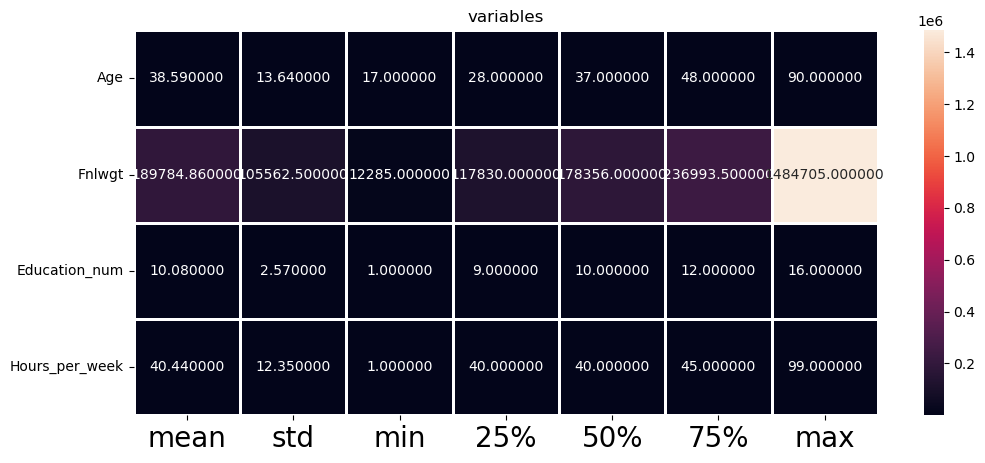

In [45]:
plt.figure(figsize=(12,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt='f')
plt.xticks(fontsize=25)
plt.xticks(fontsize=20)
plt.title('variables')
plt.show()

#### Observation of Describe of Datasets:

- We observe from description of dataset that there are 32531 rows and  13 columns, in which 4 columns contains Continuous data and 9 columns contains Categorical data.
- There are no negative value present in dataset but data is not normally distributed and also skewness is present.
- we will check for value 0, as 0 value is also null value but it is value that why while checking for null value it is not counted.

## Data Visualization

### Univariate Analysis

### Using Countplot for categorical columns

In [46]:
df.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-Sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-Sector,215646,High-School,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-Sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K


In [47]:
col_n=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
col_cat=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

df_cat=df.drop(columns=cat_cols,axis=1)
df_n=df.drop(columns=num_cols,axis=1)

Count Plot for  Workclass  column
 Pvt-Sector     28161
 Govt-Sector     4349
Not-working        21
Name: Workclass, dtype: int64


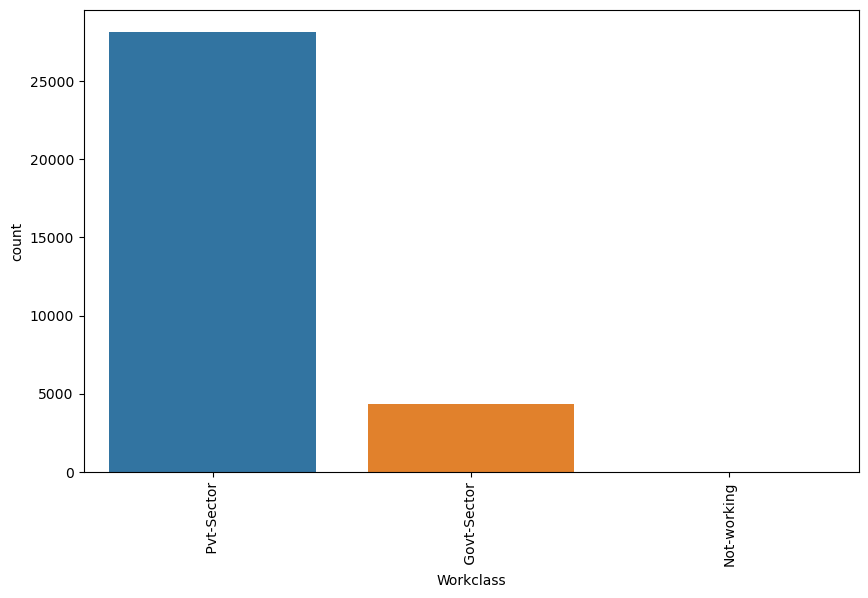

Count Plot for  Education  column
 High-School         11068
 Secondary-School     9728
 Under_Graduation     5352
 School               4248
 Post_Graduation      1722
 PhD                   413
Name: Education, dtype: int64


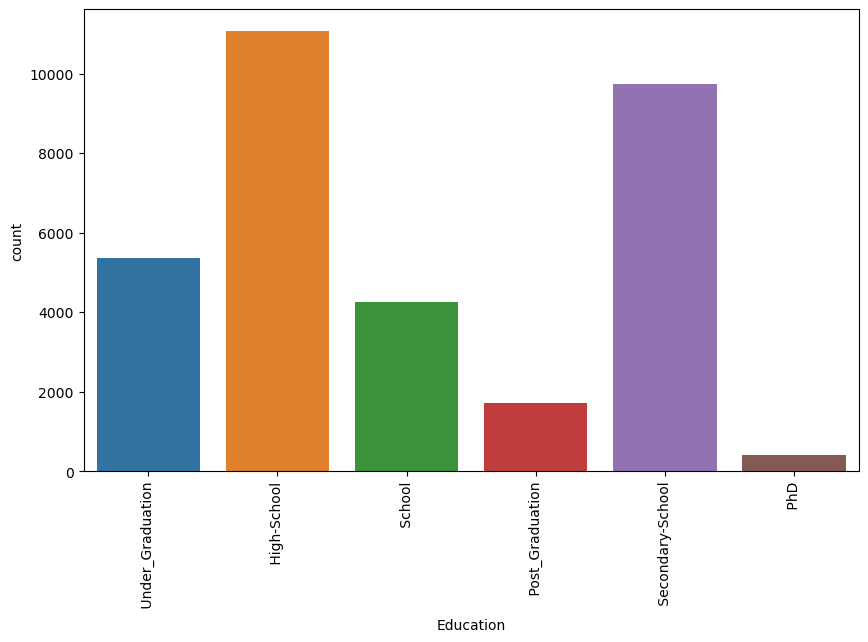

Count Plot for  Marital_status  column
 Married     14990
 Single      10664
 Divorced     6877
Name: Marital_status, dtype: int64


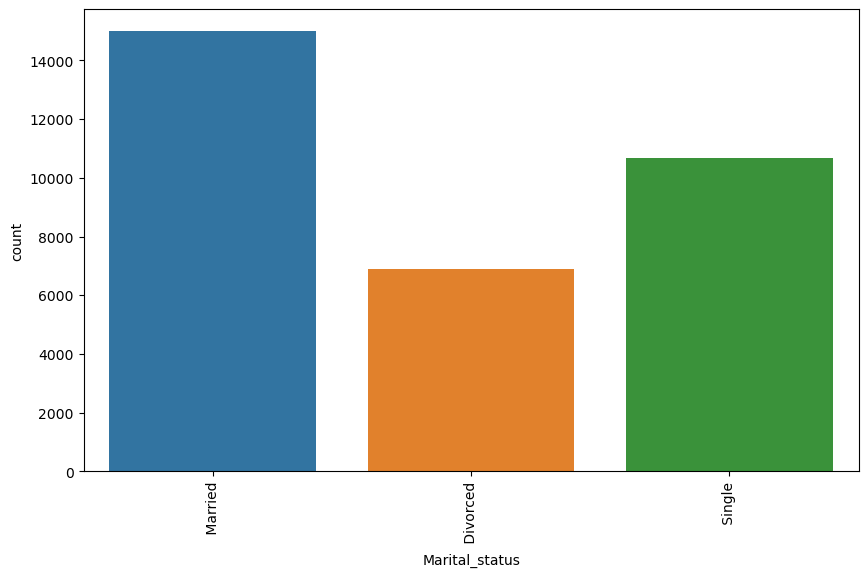

Count Plot for  Occupation  column
 Prof-specialty       5979
 Craft-repair         4093
 Exec-managerial      4065
 Adm-clerical         3766
 Sales                3649
 Other-service        3290
 Machine-op-inspct    1999
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


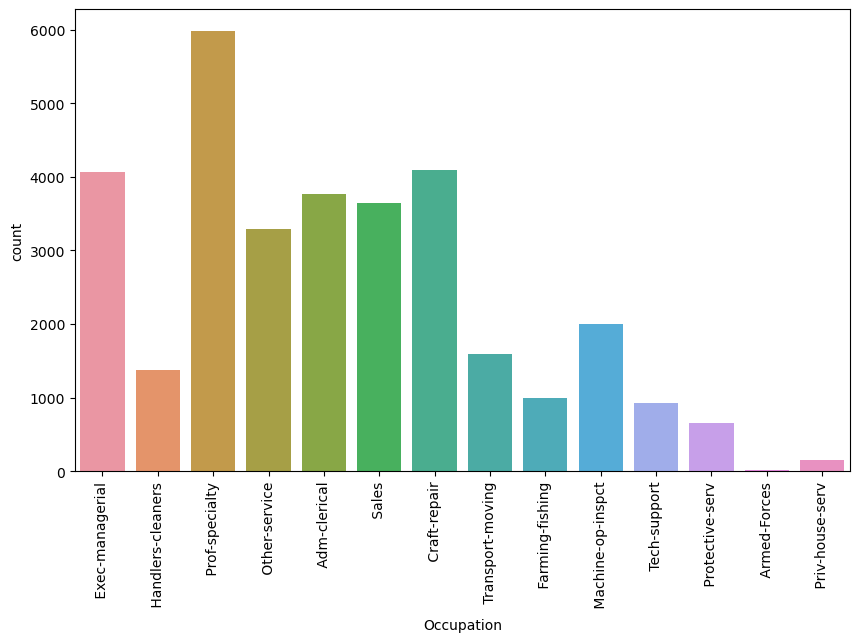

Count Plot for  Relationship  column
 Husband           13184
 Not-in-family      8290
 Own-child          5063
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


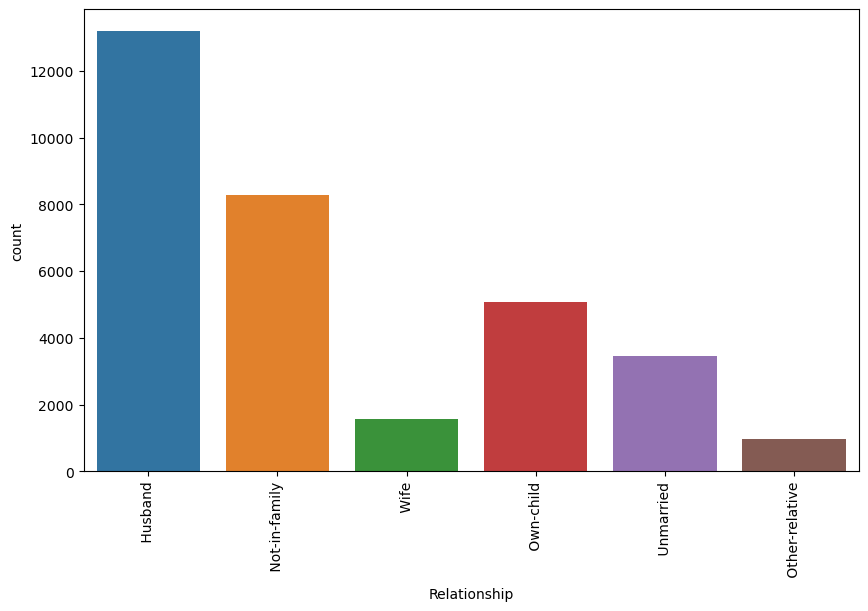

Count Plot for  Race  column
 White                 27789
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


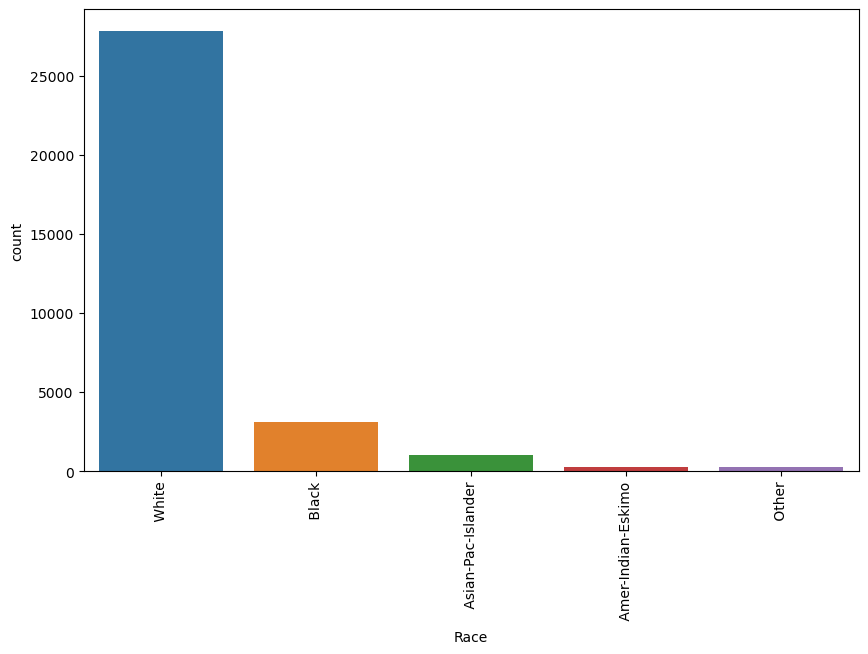

Count Plot for  Sex  column
 Male      21771
 Female    10760
Name: Sex, dtype: int64


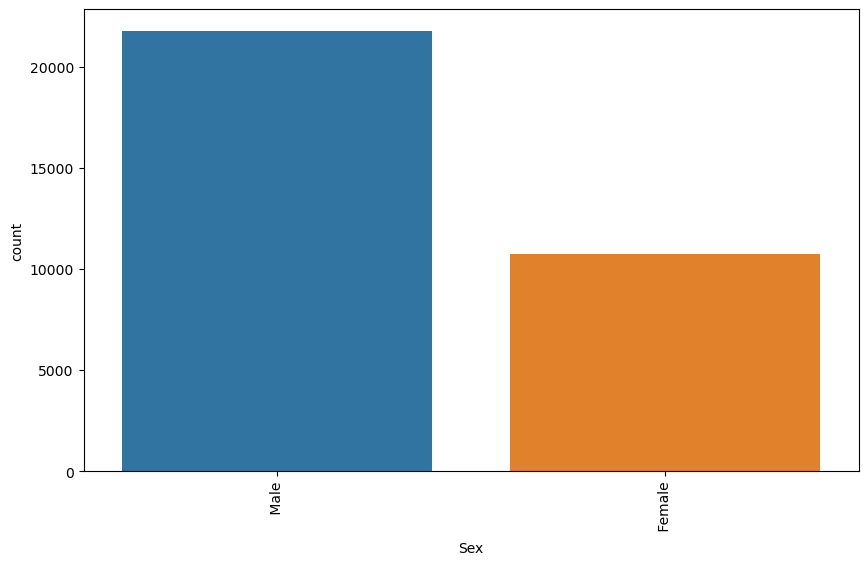

Count Plot for  Native_country  column
 United-States                 29729
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31

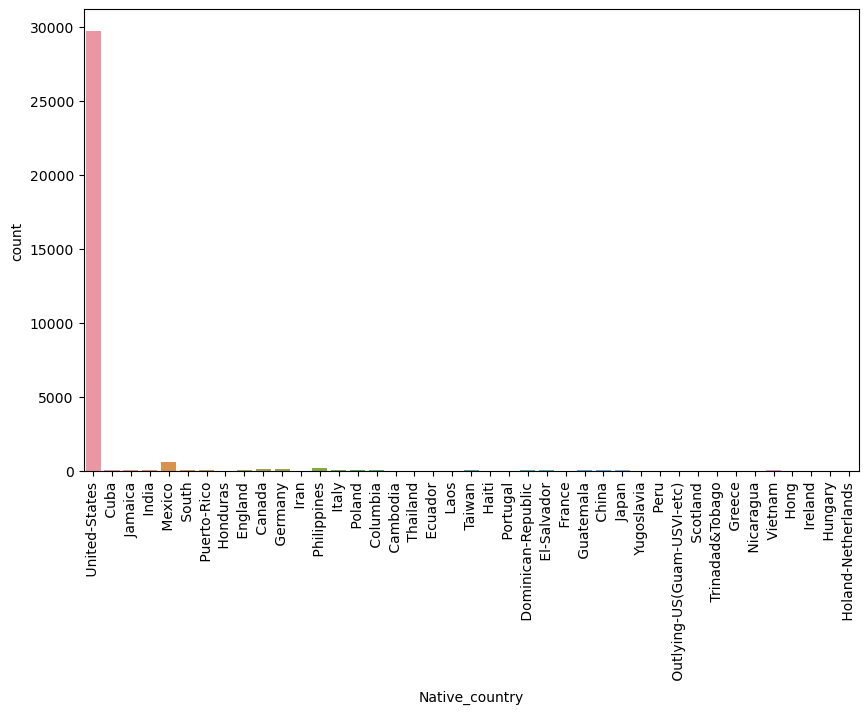

Count Plot for  Income  column
 <=50K    24693
 >50K      7838
Name: Income, dtype: int64


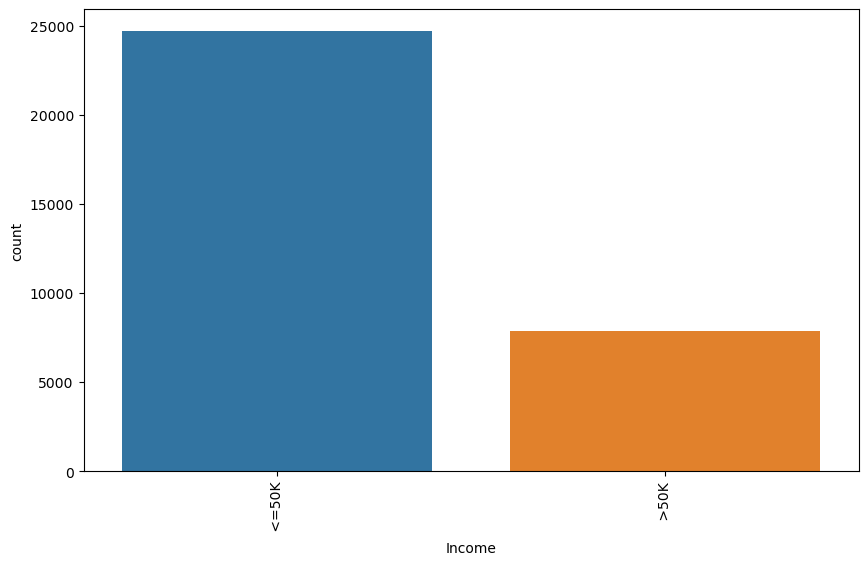

In [48]:
for i in df_n:
    print('Count Plot for ',i,' column')
    plt.figure(figsize=(10,6))
    print(df[i].value_counts())
    sns.countplot(i,data=df_n)
    plt.xticks(rotation=90)
    print("="*100)
    plt.show()

- Most of the people have the income less than or equal to 50k .

We can also observe the class imbalance so will balance the data before building our model.

# Observation from above Plotting

- We can observe most population works in Private sector (total=24532) and least population (total=7) have Never-worked
- We can observe most population passed HS-grad (total=10501) and least population (total=51) passed Preschool
- We can observe most population are Married-civ-spouse (total=14976) and least population (total=23) are Married-AF-spouse.
- We can observe most population are Occupation (total=5983) and least population (total=9) 
- We can observe Husband are more in population (total=13193) and Other-relative are least in population (total=981).
- We can observe most population are of the race White (total=27815) and least population (total=271) are of the race Other.
- We can observe most population are Male (total=21789) and least population (total=10771) are Female.
- We can observe most population are from United-States (total=29752) and least population (total=1) are from Holand-Netherlands .
- We can observe most population having <=50K income (total=24719) and least population (total=7841) having >50K income.

In [49]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-Sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-Sector,215646,High-School,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-Sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-Sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-Sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K


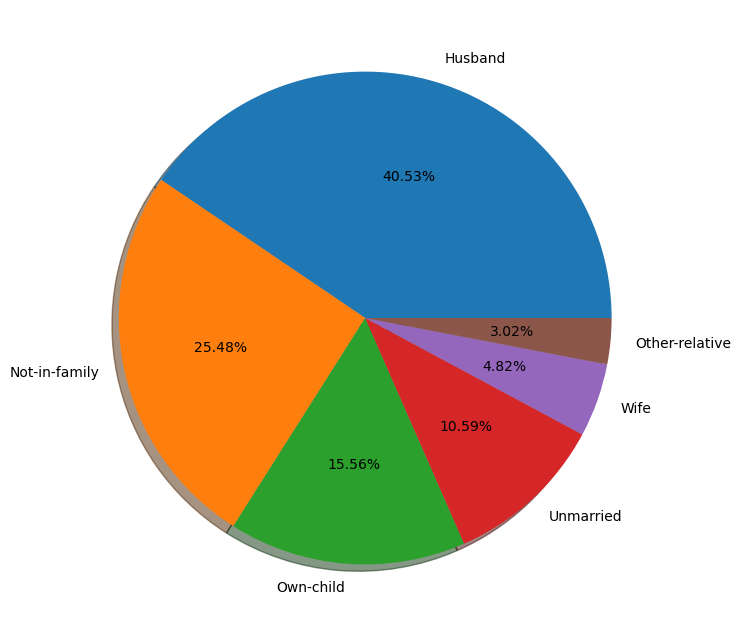

In [50]:
# visualize the count of Relationship of the people
labels = 'Husband', 'Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

- The count is high in the Husband category which has around 40% of count and other relative has very least count around 3%

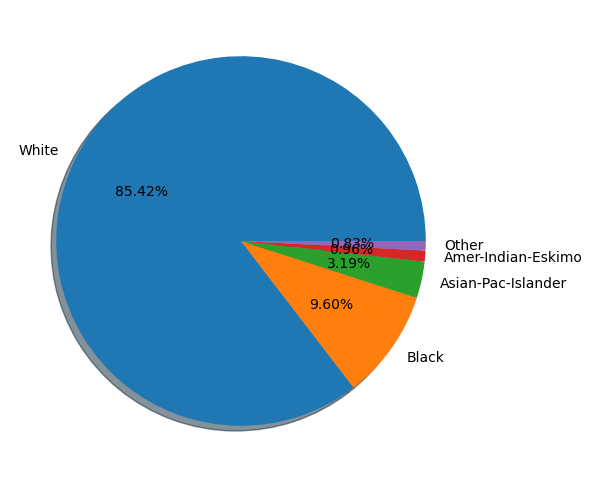

In [51]:
# visualize the count of Race of the people

labels='White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Race'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

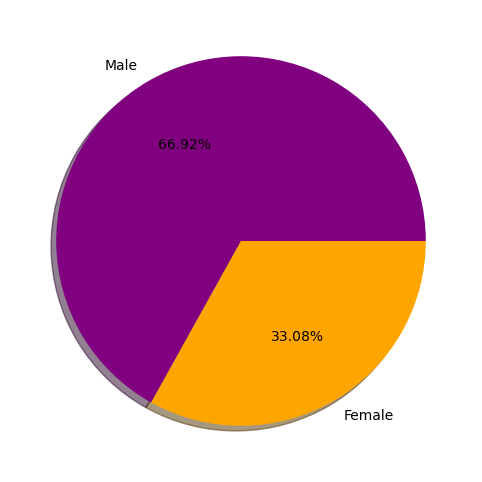

In [52]:
# visualize the count of Sex group of the people

labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,6))
colors = ["purple","orange"]
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True, colors=colors)
plt.show()

- The count of Male is high and has around 66% and only 33% of females are there.

### Using Histplot for continuous columns

#Histplot for  Age  column
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


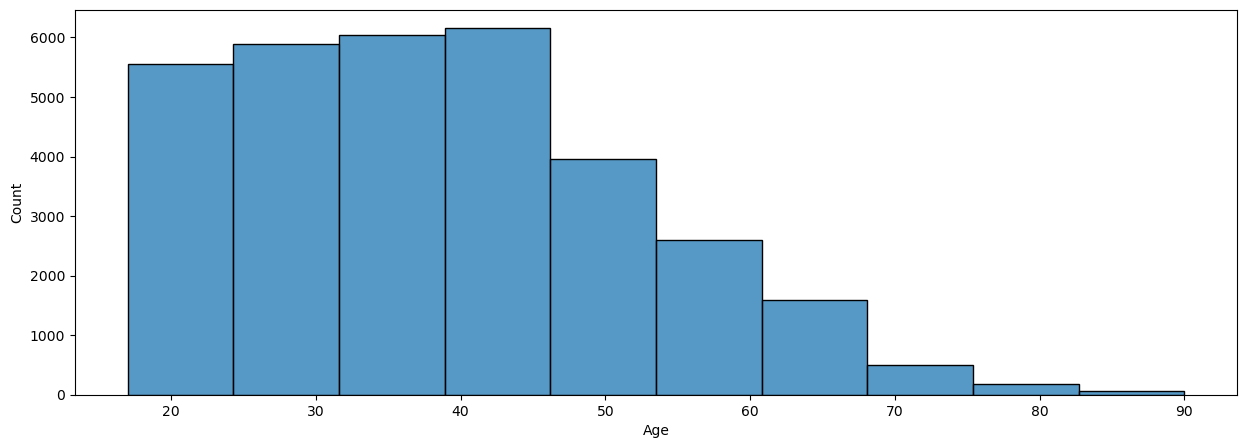

#Histplot for  Fnlwgt  column
123011    13
164190    13
203488    13
126675    12
121124    12
          ..
318082     1
138342     1
158040     1
232784     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


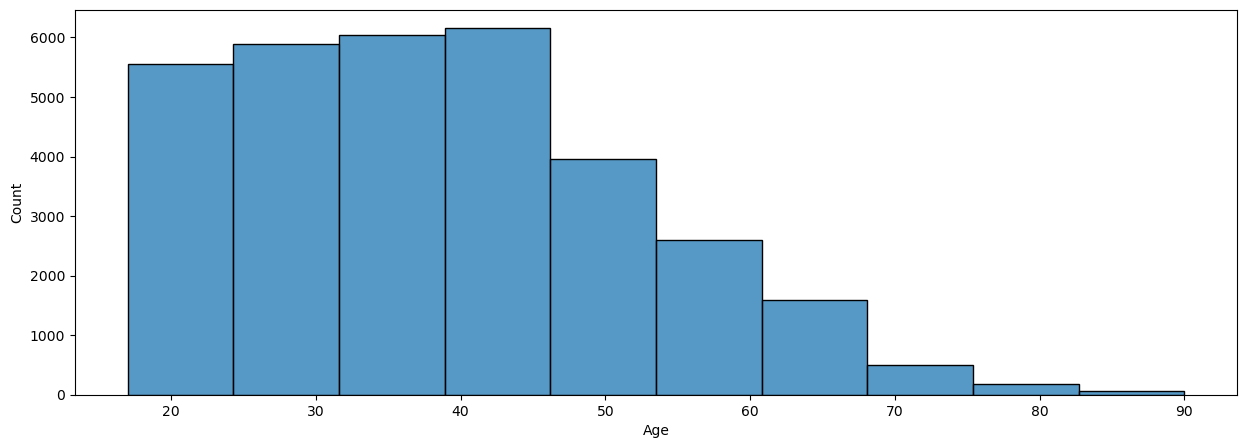

#Histplot for  Education_num  column
9     10492
10     7279
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64


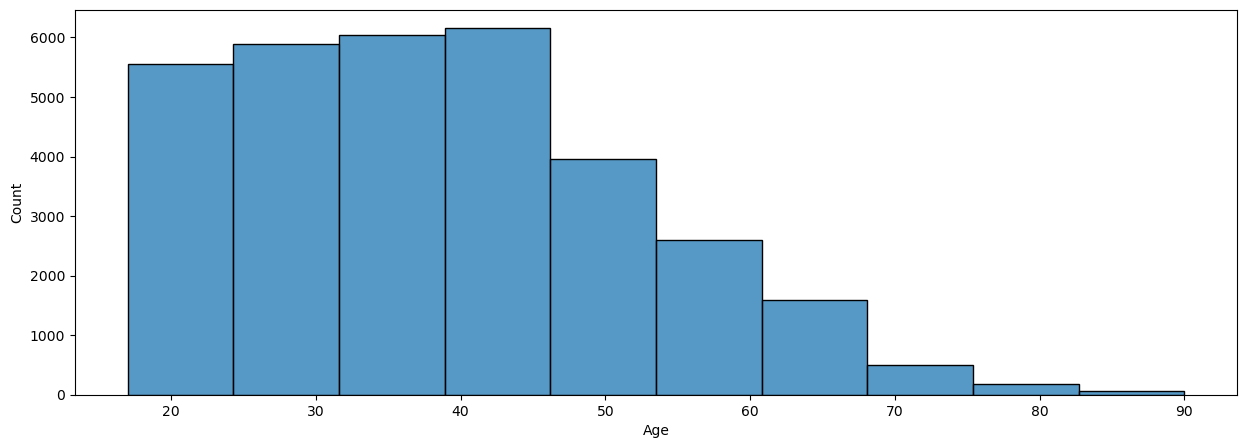

#Histplot for  Hours_per_week  column
40    15199
50     2817
45     1823
60     1475
35     1296
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64


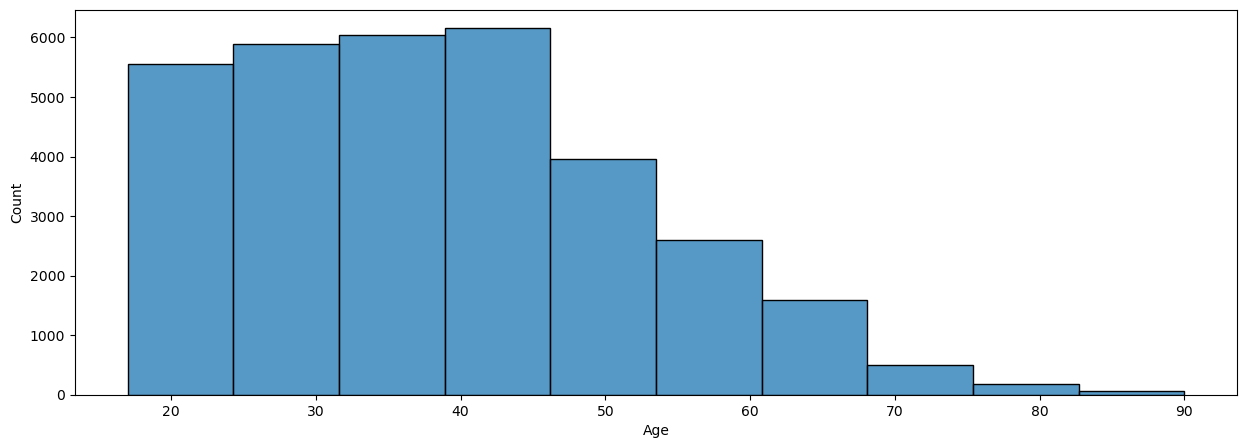

In [53]:
for j in df_cat:
    print('#Histplot for ',j,' column')
    print(df_cat[j].value_counts())
    plt.figure(figsize=(15,5))
    sns.histplot(x='Age',data=df_cat,bins=10)
    plt.show()
    print('='*100)

### Observation from above Histplot

- most population are of the Age of 36.
- most population are of the Fnlwgt (weight) of 164190 is more.
- most population are of the Education_num of 9 is more.
- most population's Hours_per_week' 40 is more.

### Bivariate Analysis

<AxesSubplot:xlabel='Workclass', ylabel='count'>

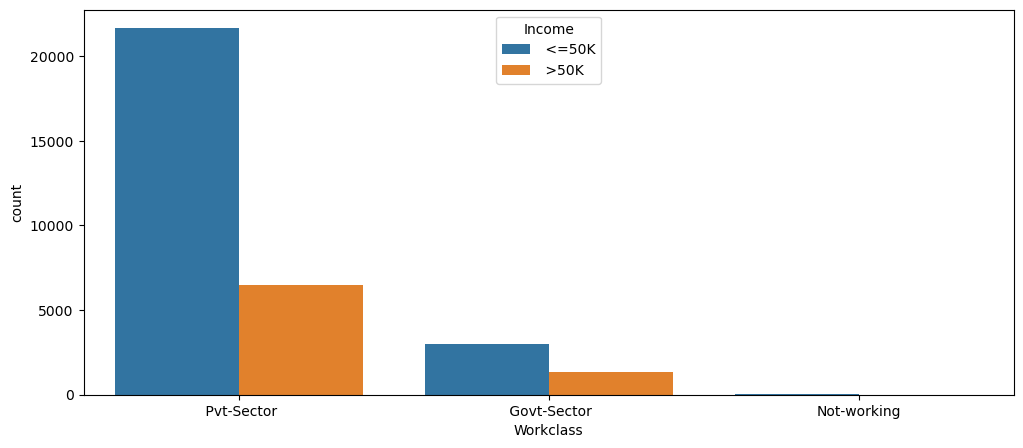

In [54]:
#Count Plot for comparision between "Workclass" column and "Income" column
plt.figure(figsize=(12,5))
sns.countplot("Workclass",data=df, hue='Income')

The most of the population works in the private sector have income <= 50k

<AxesSubplot:xlabel='Education', ylabel='count'>

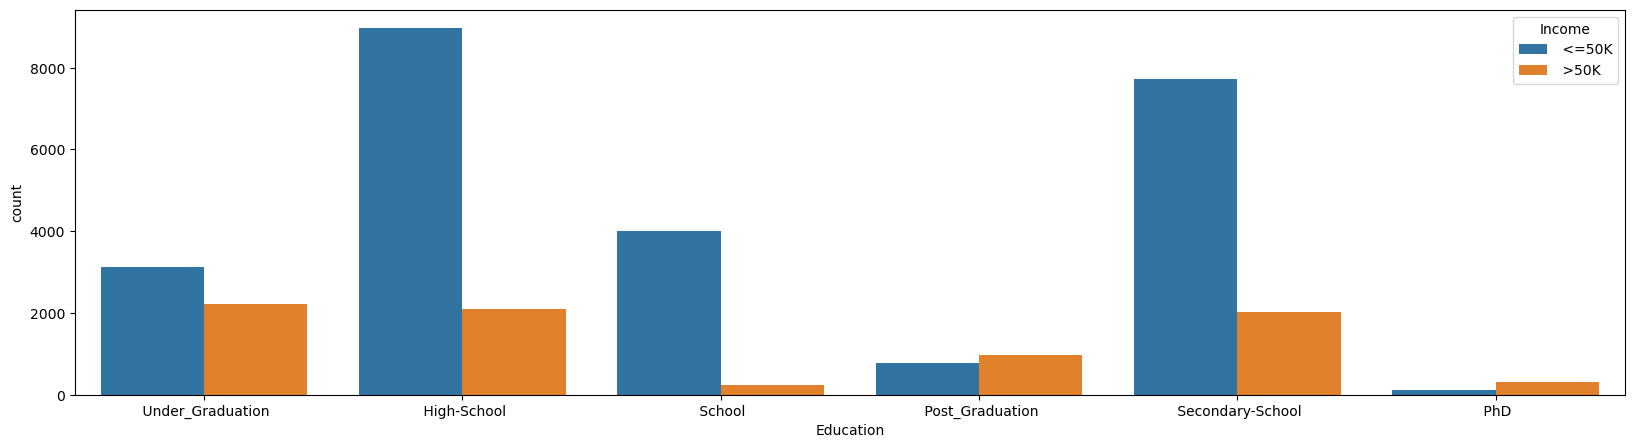

In [55]:
#Count Plot for comparision between "Education" column and "Income" column
plt.figure(figsize=(20,5))
sns.countplot("Education",data=df, hue='Income')

The most of the population having HS-grad having income <= 50k compare >50K

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

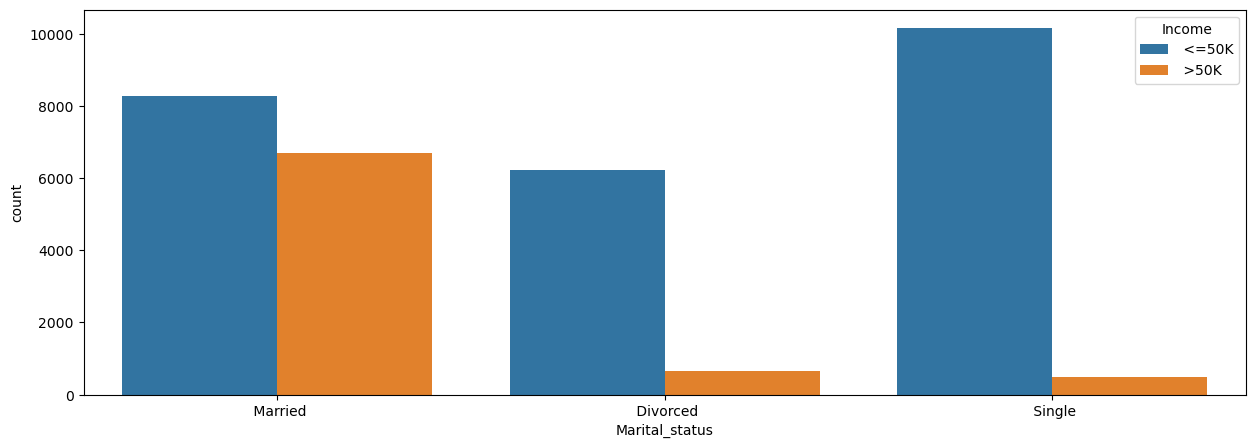

In [56]:
#Count Plot for comparision between "Marital_status" column and "Income" column
plt.figure(figsize=(15,5))
sns.countplot("Marital_status",data=df, hue='Income')

The most of the population having Marital_status "Never-married" have mostly income <=50K and having income >50K is less.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

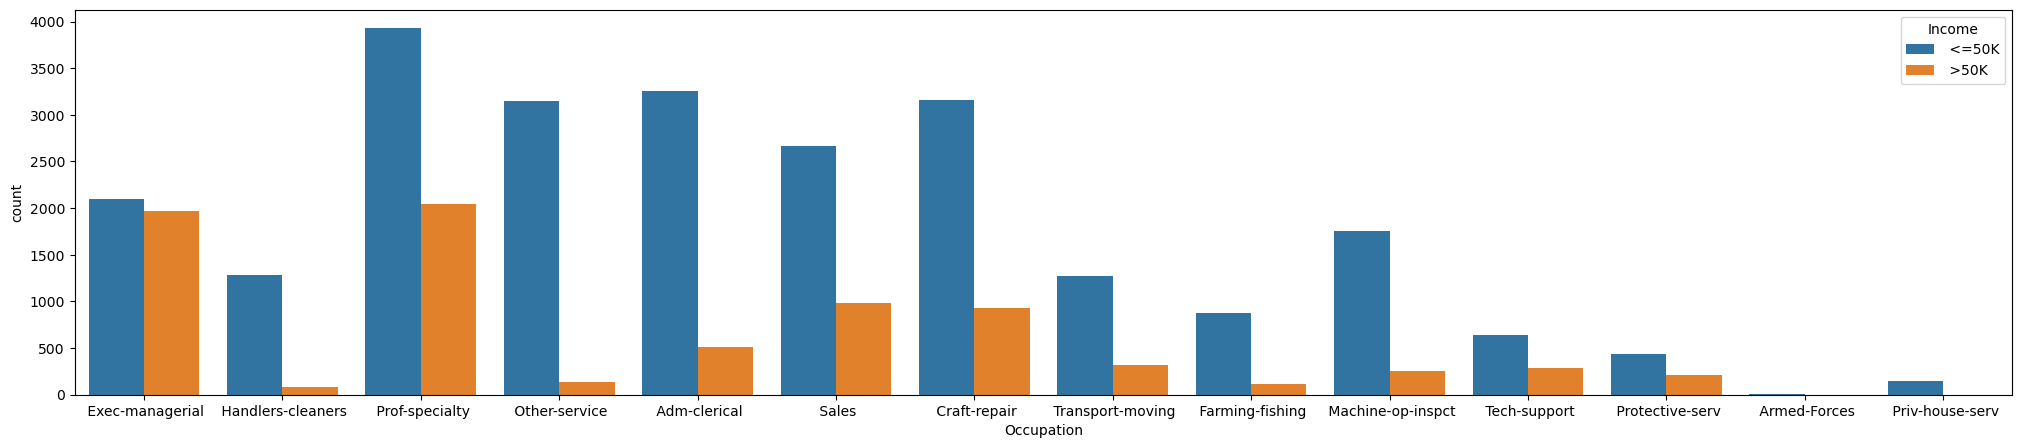

In [57]:
#Count Plot for comparision between "Occupation" column and "Income" column
plt.figure(figsize=(25,5))
sns.countplot("Occupation",data=df, hue='Income')

Having occupation Prof-Speciality is having mostly income <=50K

<AxesSubplot:xlabel='Relationship', ylabel='count'>

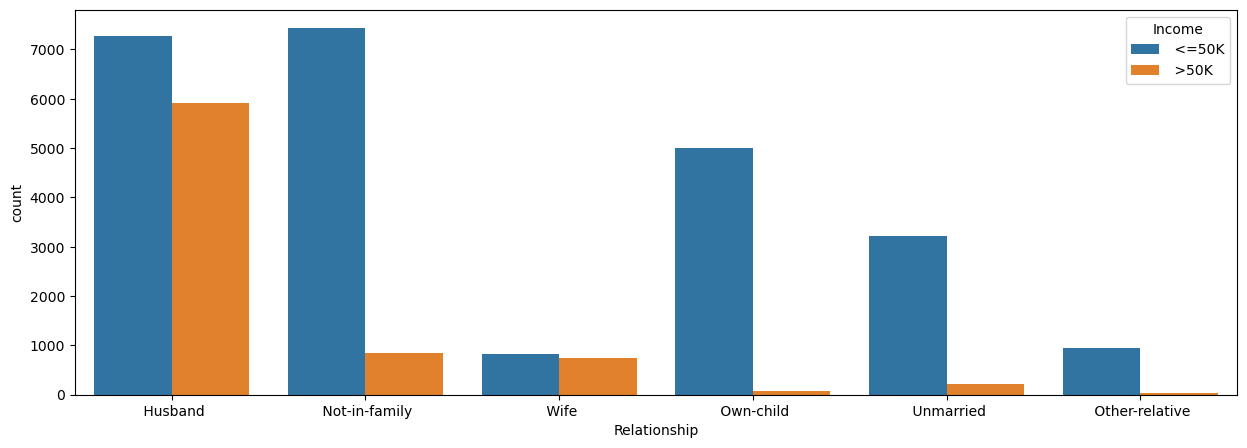

In [58]:
#Count Plot for comparision between "Relationship" column and "Income" column
plt.figure(figsize=(15,5))
sns.countplot("Relationship",data=df, hue='Income')

Income <=50K is more in Not-in-family Relationship

<AxesSubplot:xlabel='Race', ylabel='count'>

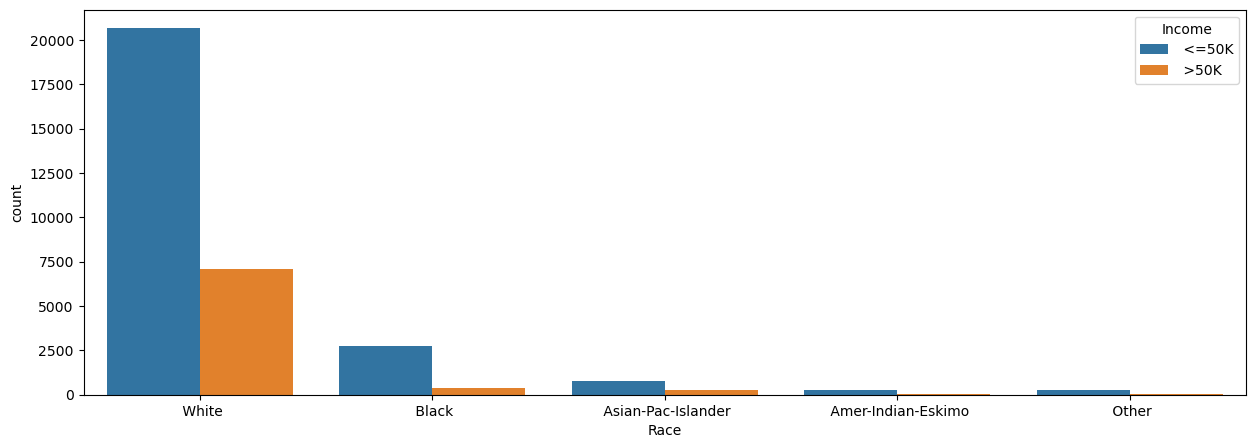

In [59]:
#Count Plot for comparision between "Race" column and "Income" column
plt.figure(figsize=(15,5))
sns.countplot("Race",data=df, hue='Income')

Population having race of "White" is having mostly income<=50K

<AxesSubplot:xlabel='Sex', ylabel='count'>

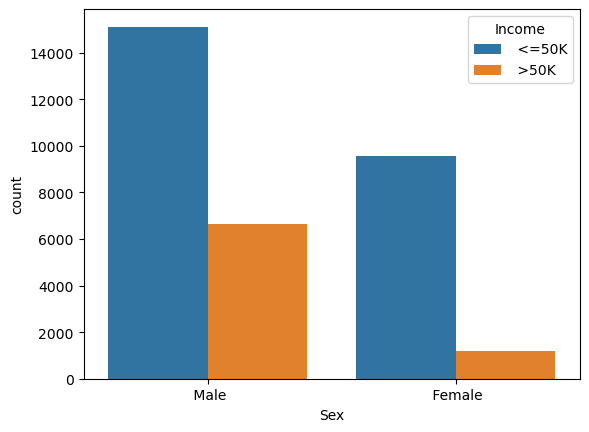

In [60]:
#Count Plot for comparision between "Sex" column and "Income" column
sns.countplot("Sex",data=df, hue='Income')

Mostly male population are having income <=50K compare to female.

<AxesSubplot:xlabel='Native_country', ylabel='count'>

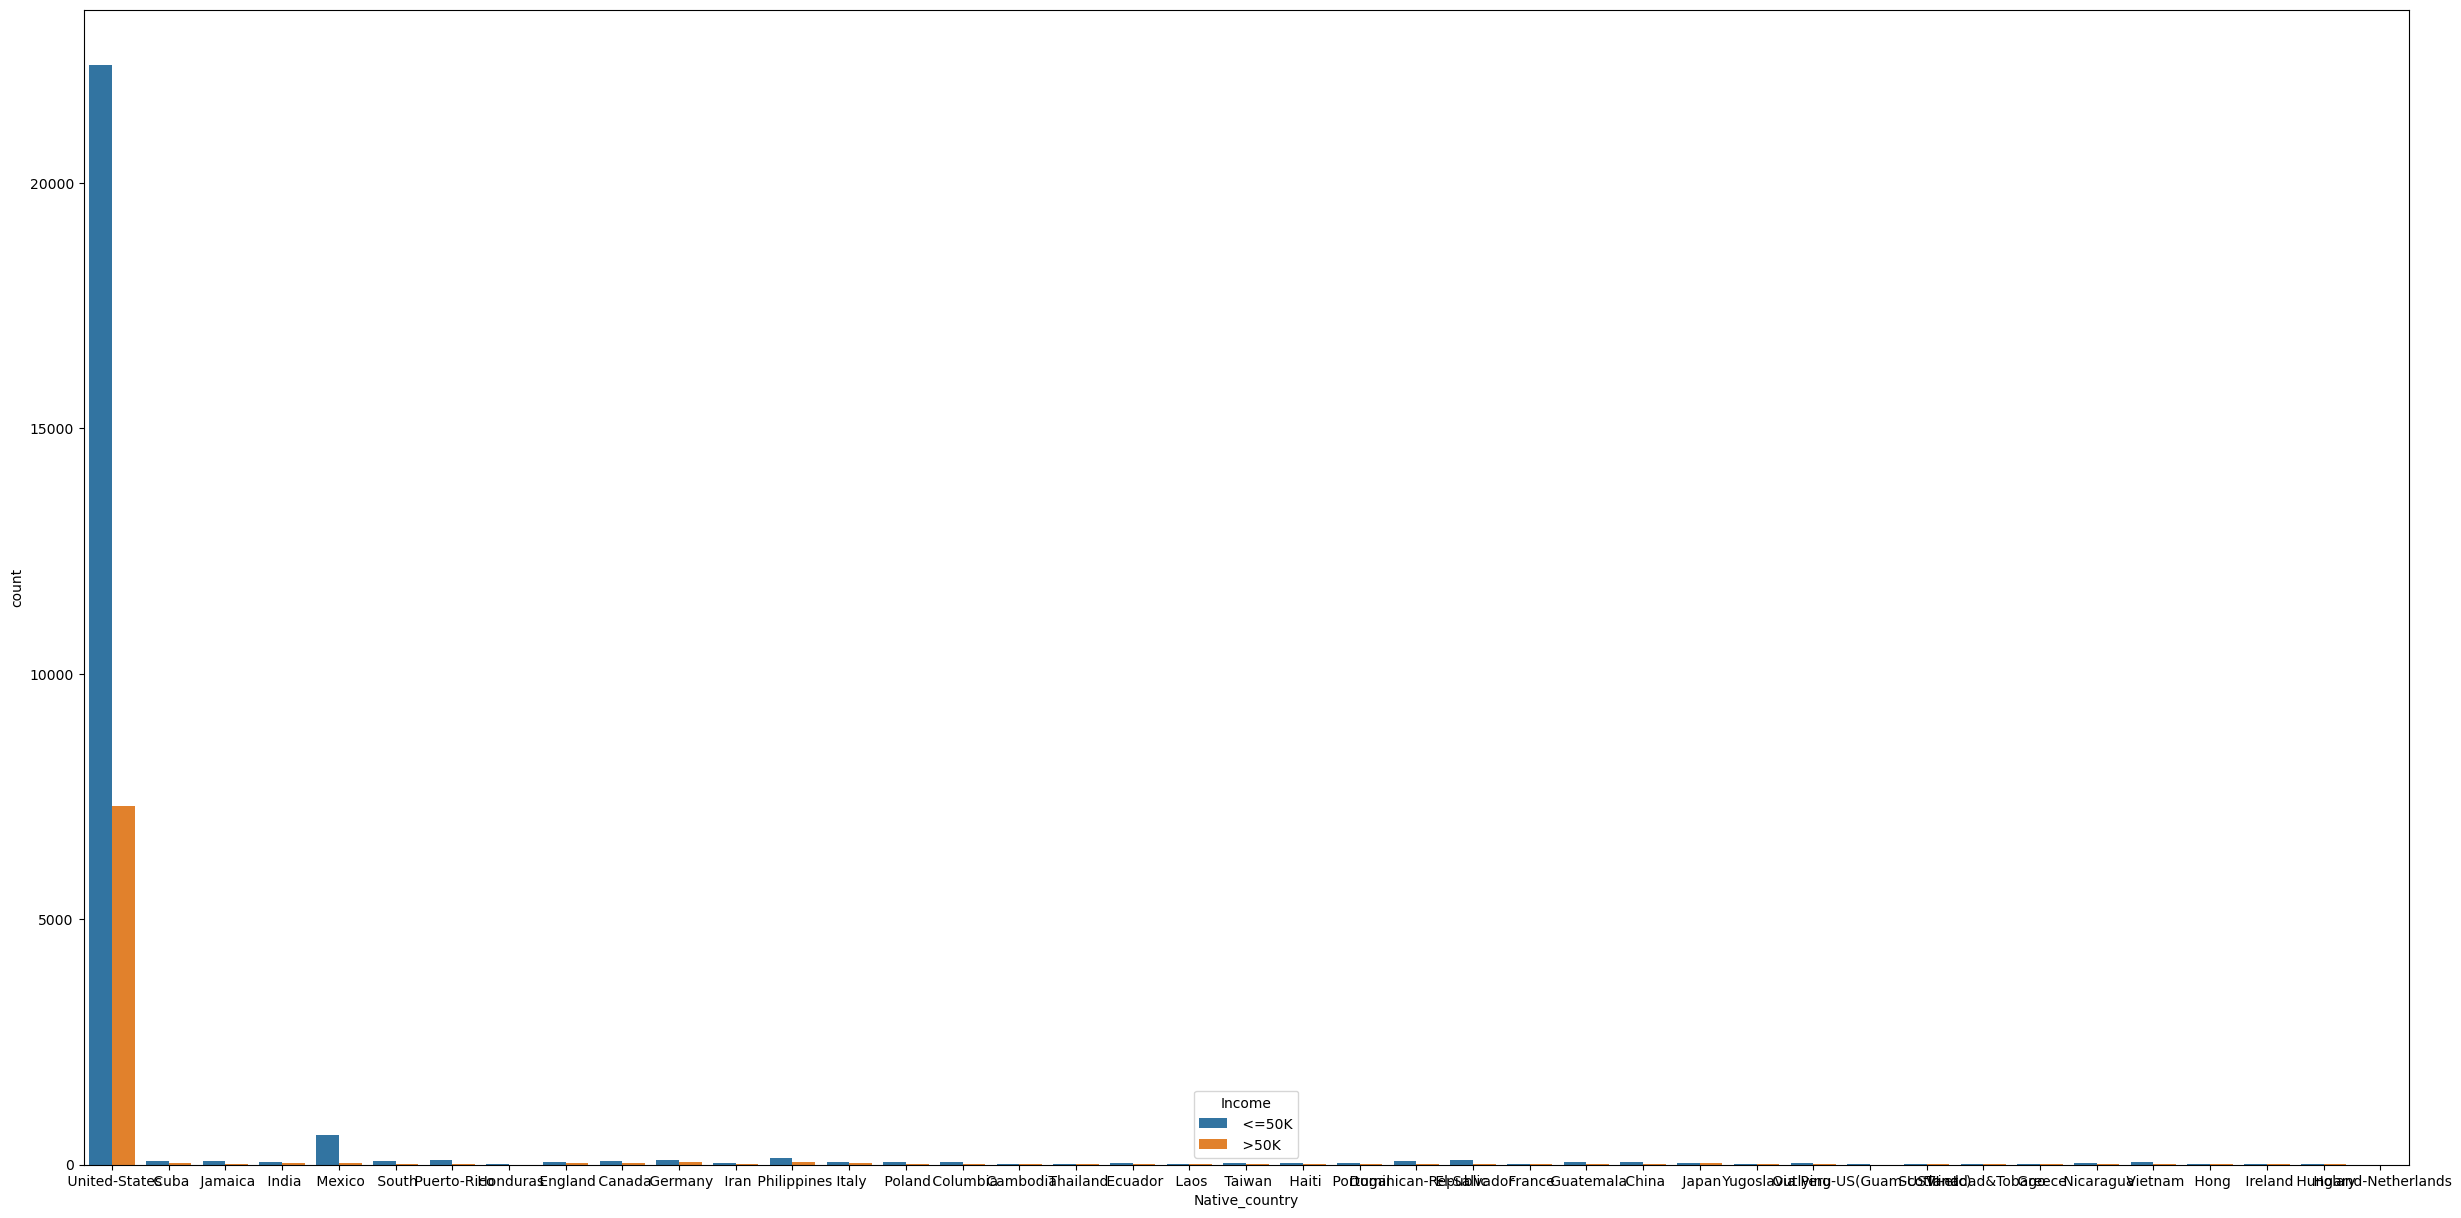

In [61]:
#Count Plot for comparision between "Native_country" column and "Income" column
plt.figure(figsize=(30,15))
sns.countplot("Native_country",data=df, hue='Income')

<AxesSubplot:xlabel='Income', ylabel='Age'>

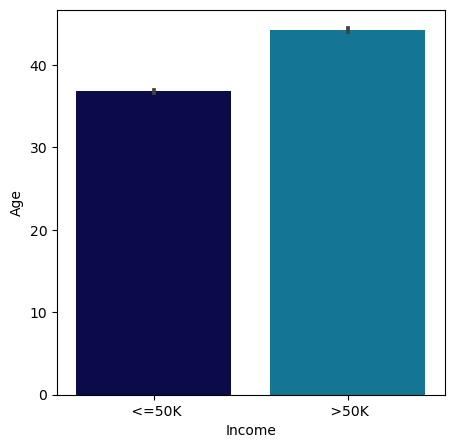

In [62]:
#Bar Plot for comparision between "Age" and "Income" column
plt.figure(figsize=(5,5))
sns.barplot(y='Age', x='Income',data=df, palette='ocean')

Population having age more than 45+ are having income >50K more compare to <=50K.

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

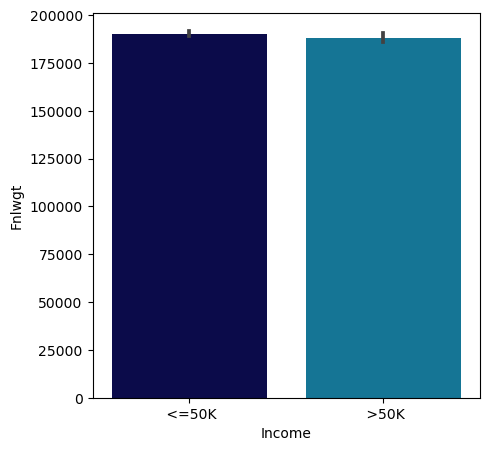

In [63]:
#Bar Plot for comparision between "Fnlwgt" and "Income" column
plt.figure(figsize=(5,5))
sns.barplot(y='Fnlwgt', x='Income',data=df, palette='ocean')

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

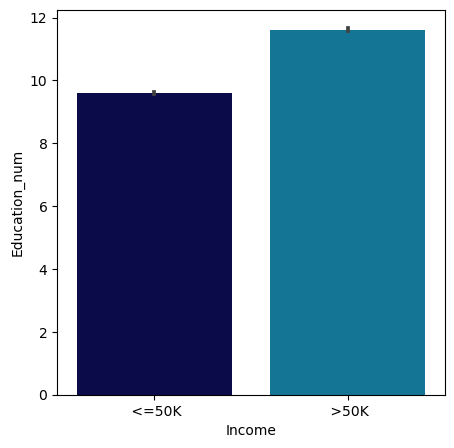

In [64]:
#Bar Plot for comparision between "Education_num" and "Income" column
plt.figure(figsize=(5,5))
sns.barplot(y='Education_num', x='Income',data=df, palette='ocean')

Income >50K is more of Education_num compare to Income <=50K of Population

### Multivariate Analysis

#### Using Pairplot

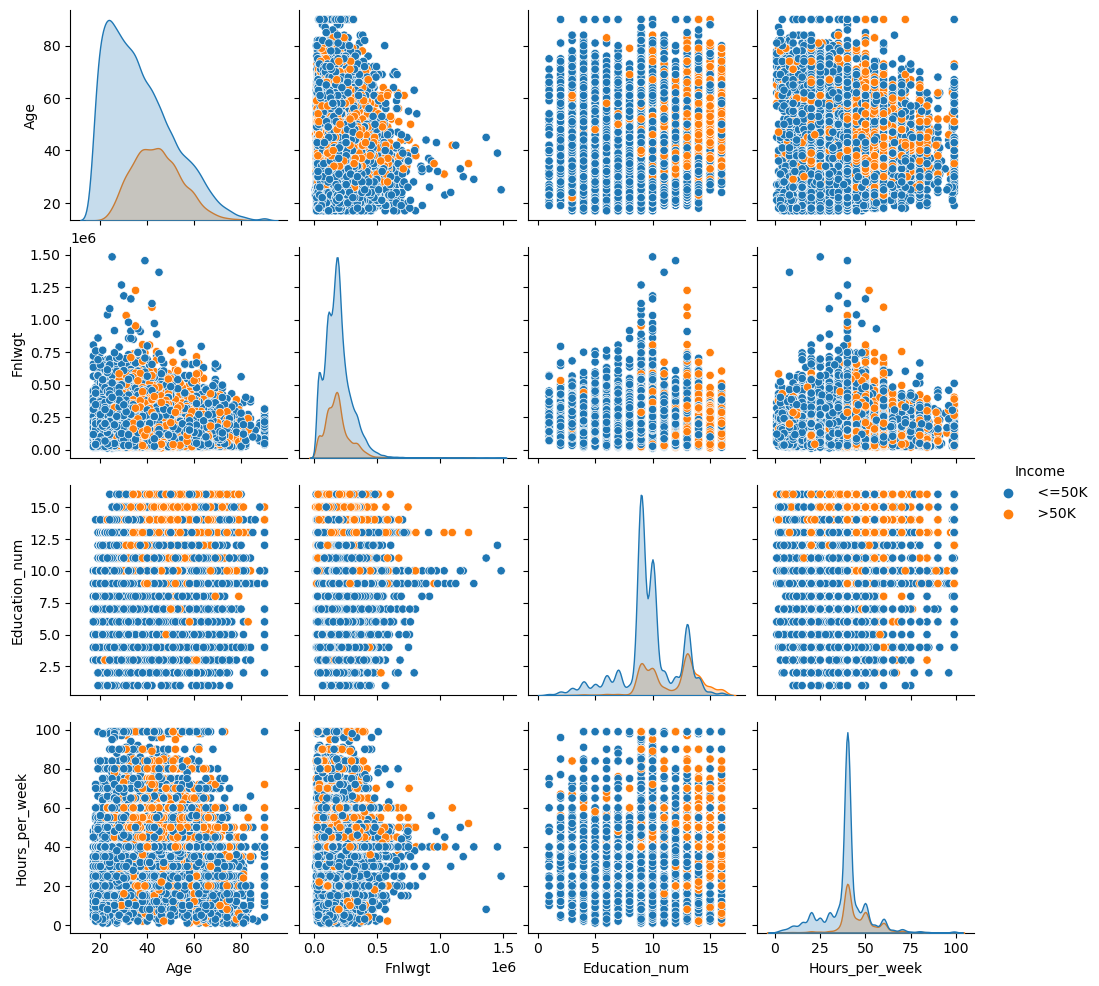

In [65]:
sns.pairplot(df,hue="Income")

## Label Encoding

In [66]:
cat_cols

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [68]:
df.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,1,83311,5,13,1,3,0,4,1,13,38,0
1,38,1,215646,0,9,0,5,1,4,1,40,38,0
2,53,1,234721,3,7,1,5,0,2,1,40,38,0


all the categorial column has been changed into Numerical column

### Correlation

In [69]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.076465,-0.076423,-0.066679,0.036228,-0.475478,0.001693,-0.263717,0.029135,0.088584,0.068442,-0.000649,0.233972
Workclass,-0.076465,1.000000,0.012028,-0.049501,-0.160156,0.049762,0.007120,-0.000330,0.053061,0.038160,-0.002899,-0.034953,-0.062766
Fnlwgt,-0.076423,0.012028,1.000000,0.000147,-0.043367,0.029911,-0.000070,0.008838,-0.021483,0.027169,-0.018897,-0.063073,-0.009536
Education,-0.066679,-0.049501,0.000147,1.000000,0.289714,0.074948,0.036043,0.001663,0.005216,-0.028986,-0.017644,-0.011441,0.083055
Education_num,0.036228,-0.160156,-0.043367,0.289714,1.000000,0.017941,0.070957,-0.094453,0.032010,0.012198,0.148433,0.088052,0.335310
Marital_status,-0.475478,0.049762,0.029911,0.074948,0.017941,1.000000,0.035913,0.042516,-0.013298,0.074399,-0.109746,0.009676,-0.106027
Occupation,0.001693,0.007120,-0.000070,0.036043,0.070957,0.035913,1.000000,-0.037464,-0.004775,0.047630,-0.012841,-0.002115,0.034387
Relationship,-0.263717,-0.000330,0.008838,0.001663,-0.094453,0.042516,-0.037464,1.000000,-0.116031,-0.582584,-0.248848,-0.010822,-0.250955
Race,0.029135,0.053061,-0.021483,0.005216,0.032010,-0.013298,-0.004775,-0.116031,1.000000,0.087482,0.041950,0.116834,0.071866
Sex,0.088584,0.038160,0.027169,-0.028986,0.012198,0.074399,0.047630,-0.582584,0.087482,1.000000,0.229137,0.001751,0.215954


This gives the correlation between the dependent and independent variables.

In [70]:
df.corr()['Income'].sort_values()

Relationship     -0.250955
Marital_status   -0.106027
Workclass        -0.062766
Fnlwgt           -0.009536
Native_country    0.022864
Occupation        0.034387
Race              0.071866
Education         0.083055
Sex               0.215954
Hours_per_week    0.229654
Age               0.233972
Education_num     0.335310
Income            1.000000
Name: Income, dtype: float64

##### We can observe :

- All columns are sorted in ascending order showing least to strong correlation with target column.
- 3 columns are negatively correlated and 9 columns are positively correlated.
- Column 'Education_num' is highly correlated with Target column and Column 'Relationship' is least correlated with Target column

## Visualizing the correlation matrix by plotting heat map.

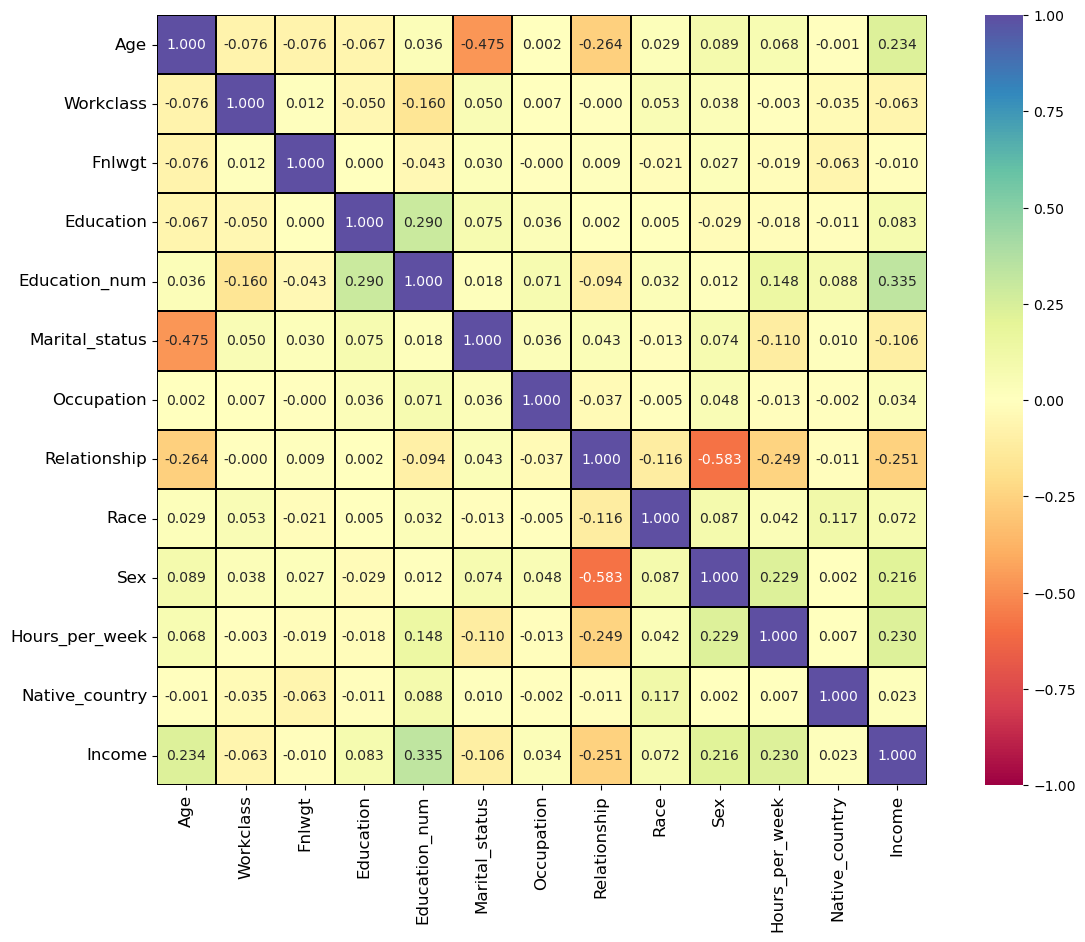

In [71]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Outcome of Correlation
 - Age has 23 percent correlation with the target column which can be considered as good correlation and positively correlated. 
 - Workclass has -6.3 percent correlation with the target column which can be considered as good correlation and Negatively correlated. 
 - Fnlwgt has -1 percent correlation with the target column which can be considered as good correlation and negatively correlated. 
 - Education has 8 percent correlation with the target column which can be considered as good correlation and positively correlated. 
 - Education_num has 34 percent correlation with the target column which can be considered as strong correlation and positively correlated. 
 - Marital_status has -10 percent correlation with the target column which can be considered as good correlation and negatively correlated. 
 - Occupation has 3 percent correlation with the target column which can be considered as good correlation and positively correlated. 
 - Relationship has -25 percent correlation with the target column which can be considered as weak correlation and negatively correlated. 
 - Race has 7 percent correlation with the target column which can be considered as good correlation and positively correlated. 
 - Sex has 22 percent correlation with the target column which can be considered as strong correlation and positively correlated. 
 - Hours_per_week has 23 percent correlation with the target column which can be considered as good correlation and positively correlated. 
 - Native_country has 2 percent correlation with the target column which can be considered as good correlation and positively correlated. 
  

 - Max correlation is with Education_num 
 - Min correlation is with Relationship

#### Checking correlation with barplot

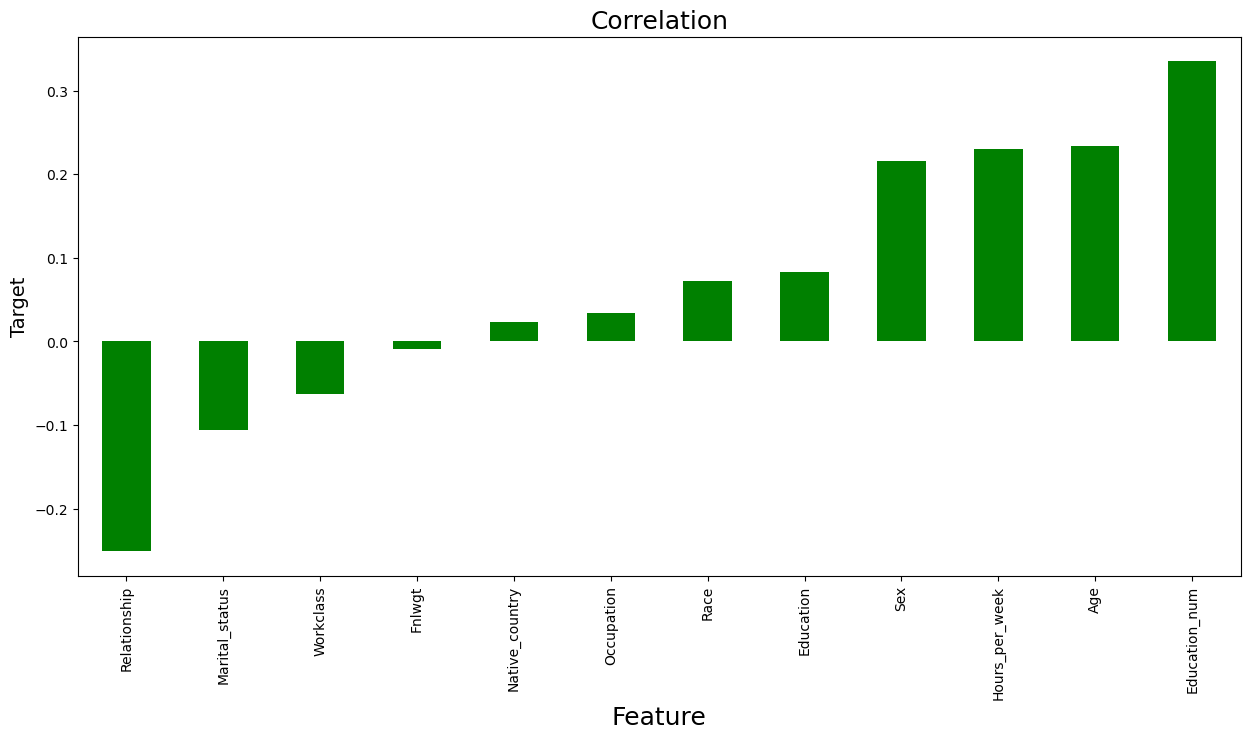

In [72]:
plt.figure(figsize=(15,7))
df.corr()['Income'].sort_values(ascending=True).drop(['Income']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

##### Outcome:
- Here we can see Workclass is least but positively correletaed with Target Column and Relationship is highly but negatively correletaed with Target Column. 
- So, Least correlated is Relationship and Highly correlated is Education_num with target column.

## Checking Outliers

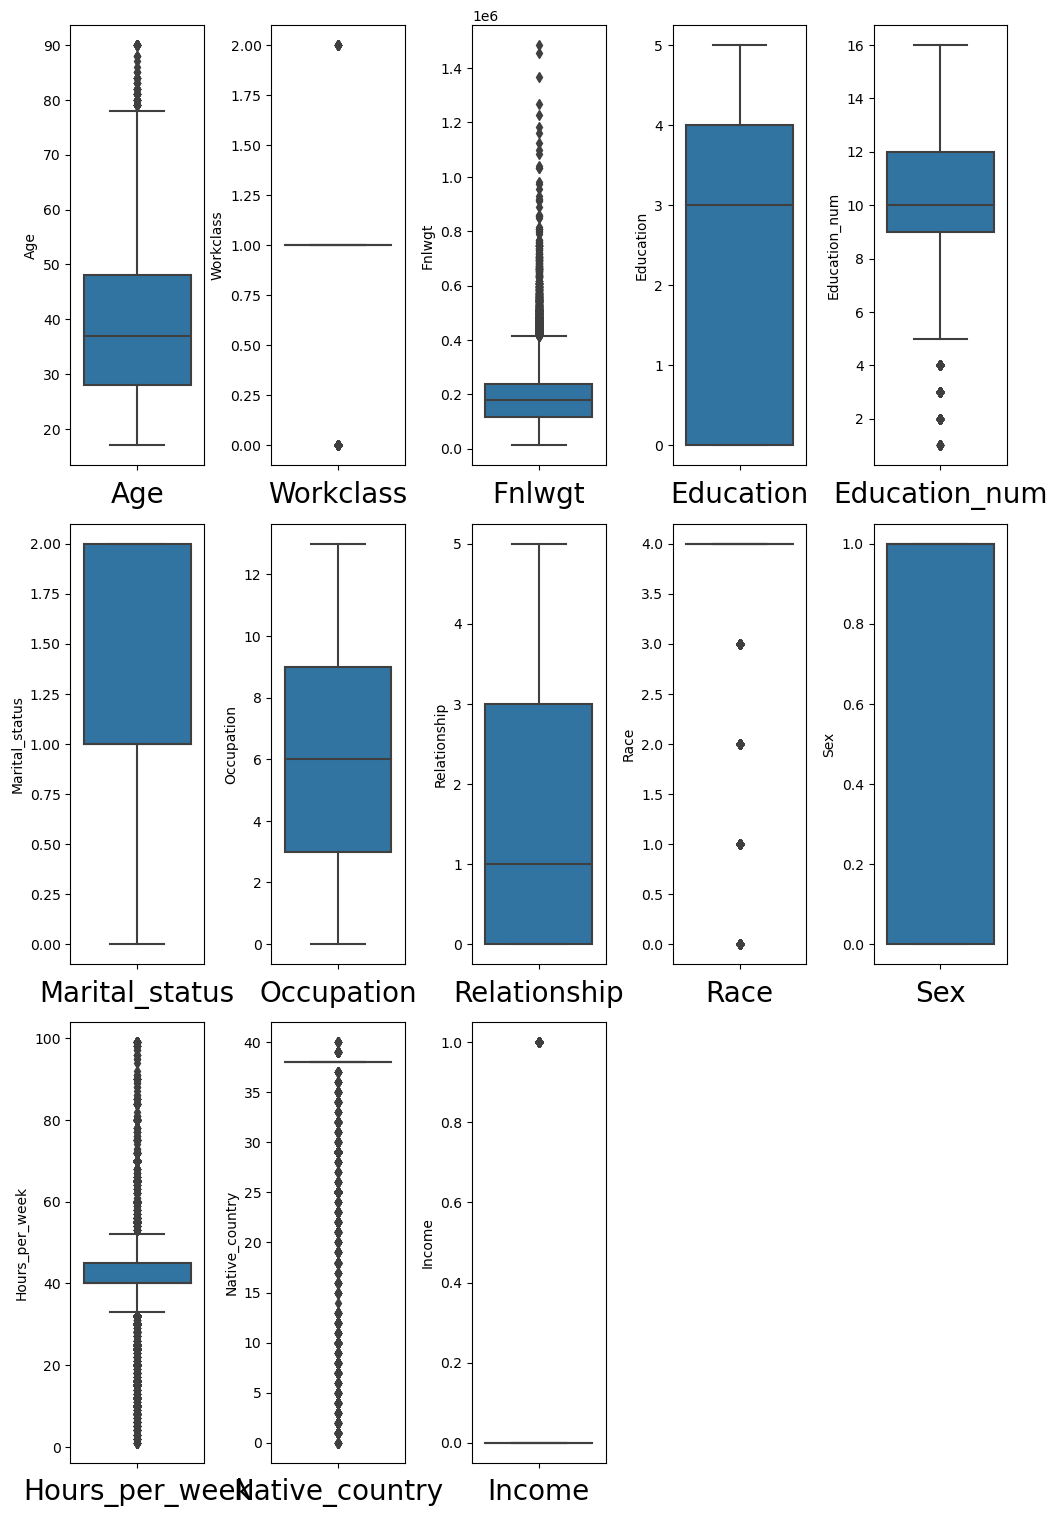

In [73]:
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1
#features = df.drop("primary_fuel", axis=1)
for column in df.columns: #column in features:
    if plotnumber<=13:
        ax = plt.subplot(3,5,plotnumber)
        sns.boxplot(y=column, data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

### Observation:
- Outliers present in columns: 'Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Race', 'Hours_per_week', 'Native_country', 'Income'.

- Outliers not present in columns: 'Marital_status', 'Occupation', 'Relationship', 'Sex'.     
       

### Removing Outliers using Zscore

In [74]:
variables = df[['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']]
z=np.abs(zscore(variables))

# Creating new dataframe
df_new= df[(z<3).all(axis=1)]
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,1,83311,5,13,1,3,0,4,1,13,38,0
1,38,1,215646,0,9,0,5,1,4,1,40,38,0
2,53,1,234721,3,7,1,5,0,2,1,40,38,0
3,28,1,338409,5,13,1,9,5,2,0,40,4,0
4,37,1,284582,2,14,1,3,5,4,0,40,38,0


In [75]:
z.head()

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.836934,1.008649,1.134707,2.222478
1,0.042975,0.244988,0.420644,0.035729
2,1.056912,0.425689,1.198320,0.035729
3,0.776233,1.407947,1.134707,0.035729
4,0.116301,0.898033,1.523545,0.035729


In [76]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df_new.shape)
print("Total Dropped rows:",df.shape[0]-df_new.shape[0])

Old DataFrame data in Rows and Column: (32531, 13)
New DataFrame data in Rows and Column: (31437, 13)
Total Dropped rows: 1094


### Percentage Data Loss using Zscore

In [77]:
loss_percentage=(32531-31437)/32531*100
print(loss_percentage,'%')

3.362946112938428 %


Data loss can be bear

## Checking for the skewness

In [78]:
df_new.skew().sort_values()

Native_country   -4.361860
Race             -2.453411
Workclass        -2.091085
Sex              -0.708659
Hours_per_week   -0.340655
Education        -0.273311
Marital_status   -0.185342
Education_num    -0.159392
Occupation        0.003014
Age               0.472351
Fnlwgt            0.635771
Relationship      0.777388
Income            1.205394
dtype: float64

In [79]:
cat_cols

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [80]:
num_cols

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']

### Observation:
- Skewness threshold taken is +/-0.50
- Columns which are having skewness: Fnlwgt, Relationship, Race, Sex, Native_country and Income.
- The Native_country column data is negatively highly skewed and Relationship is positively highly skewed
- All the columns are not normallly distributed, they are skewed.
- Since Education, Relationship, Race, Sex and Native_country are  categorical column so we will not remove skewness from them and Income is Target Column so we will not remove skewness. 
- Only we will remove skewness from Fnlwgt as this column contains continuous data.

### Checking skweness through Data Visualization

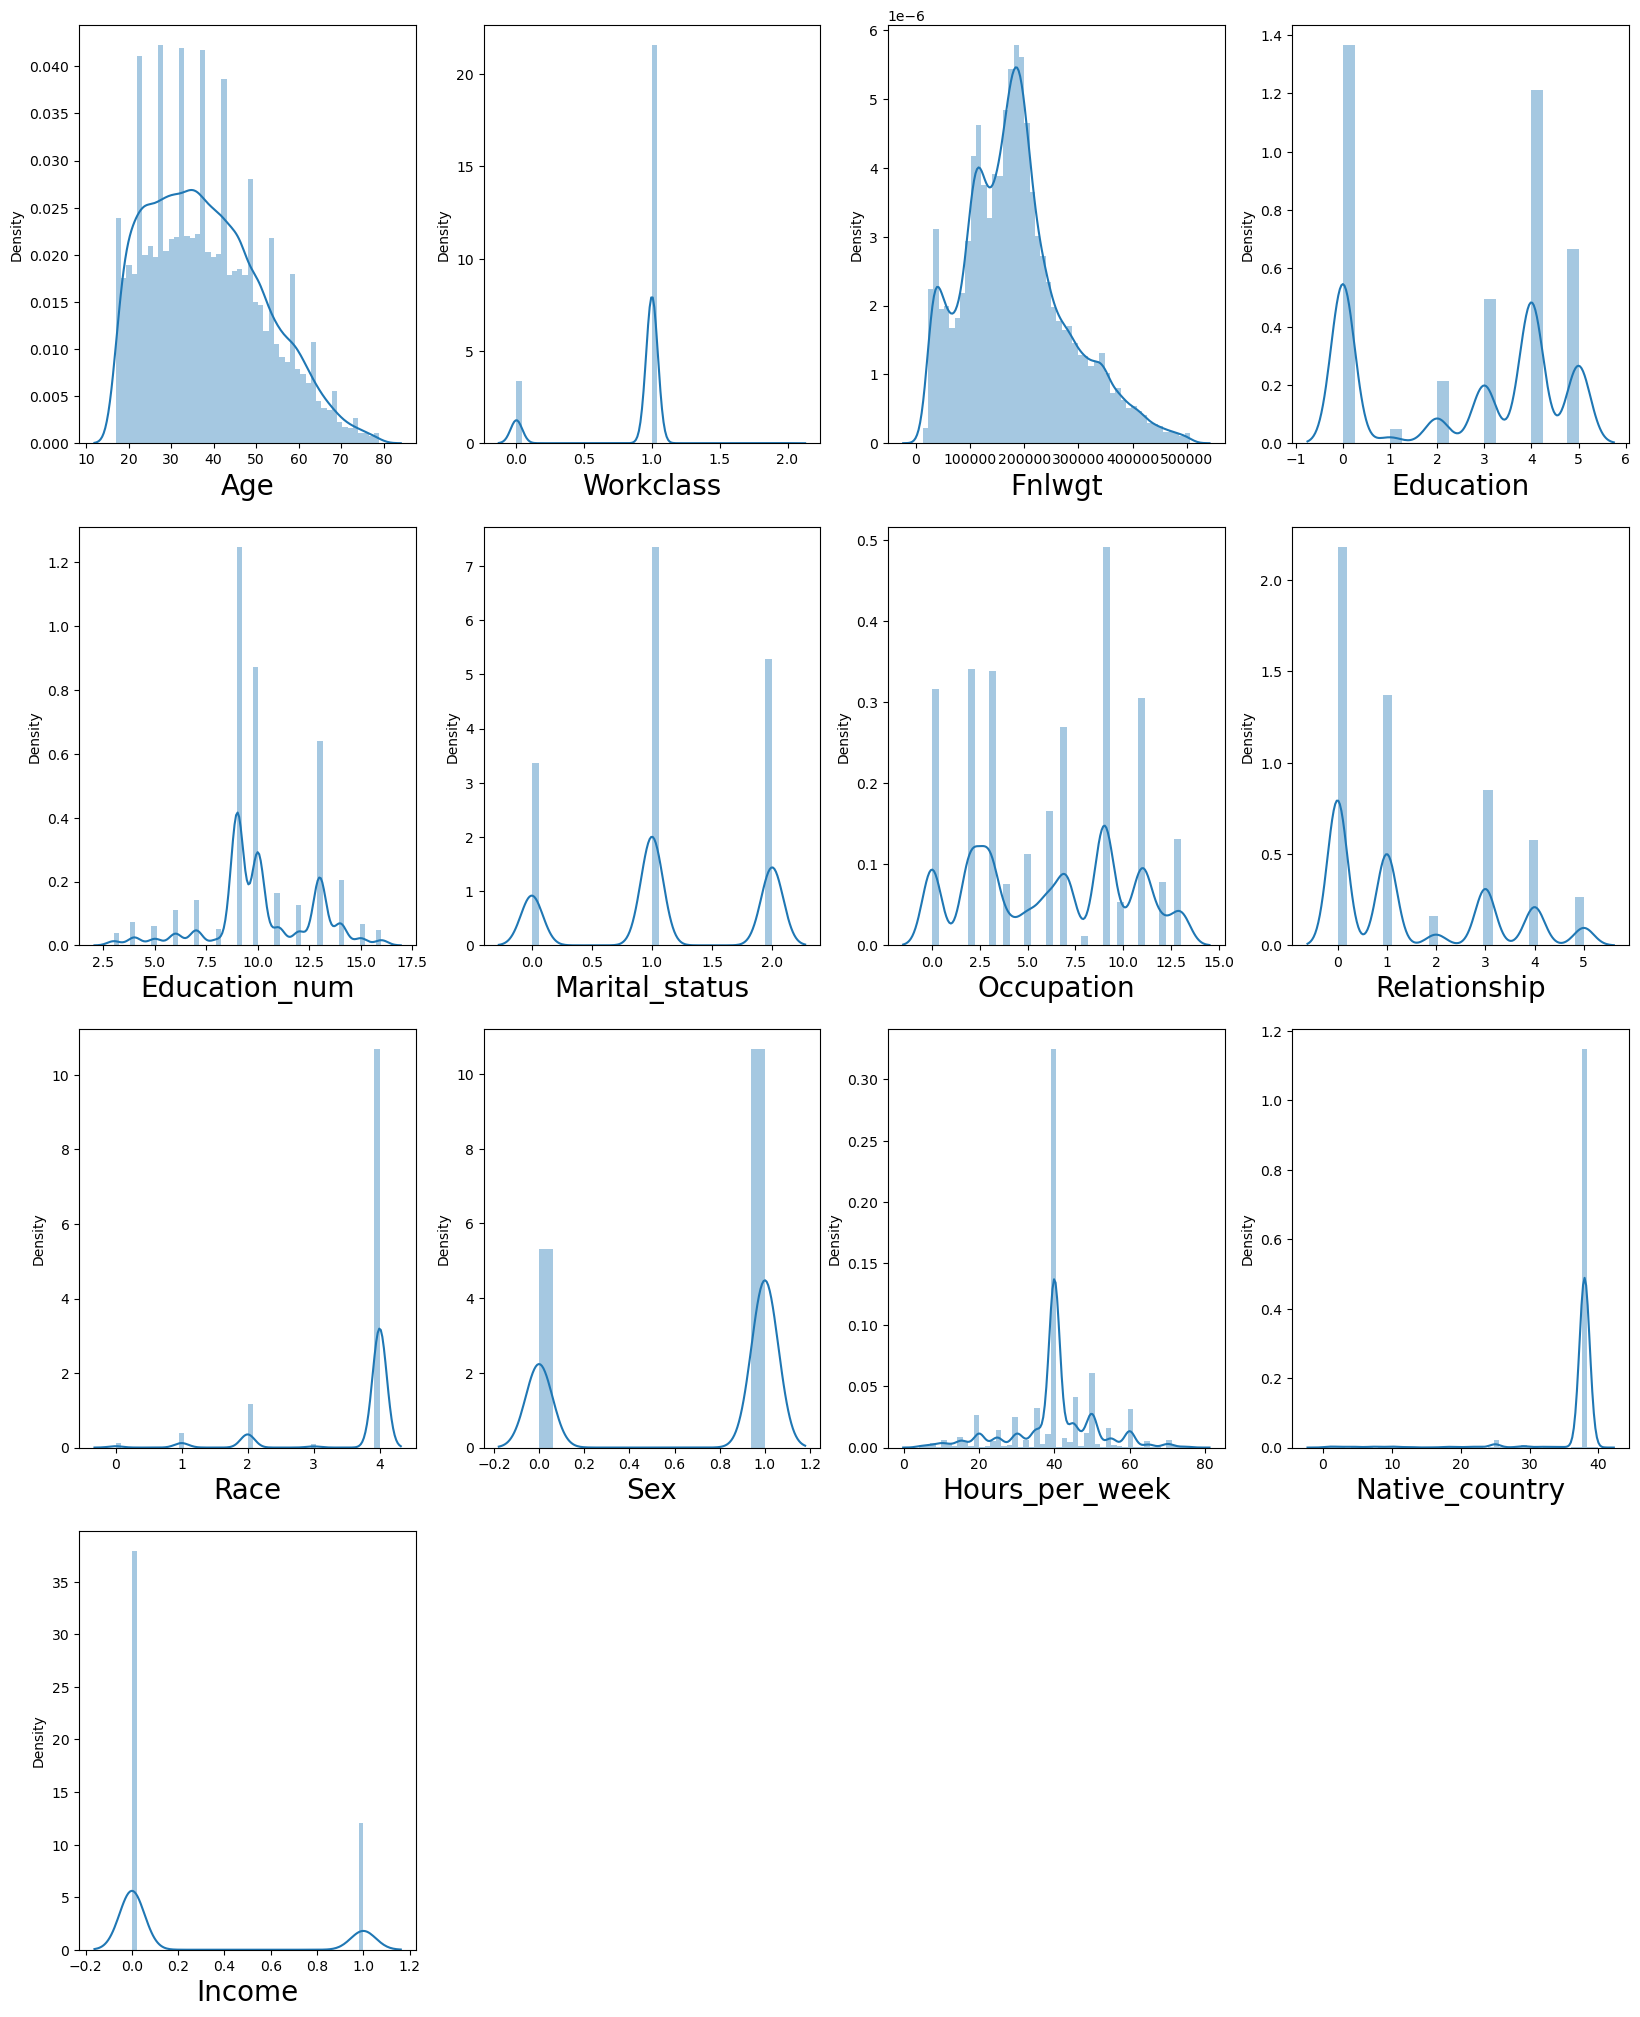

In [81]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new:
    if plotnumber<=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Data visualization of skewed continuous column using distplot

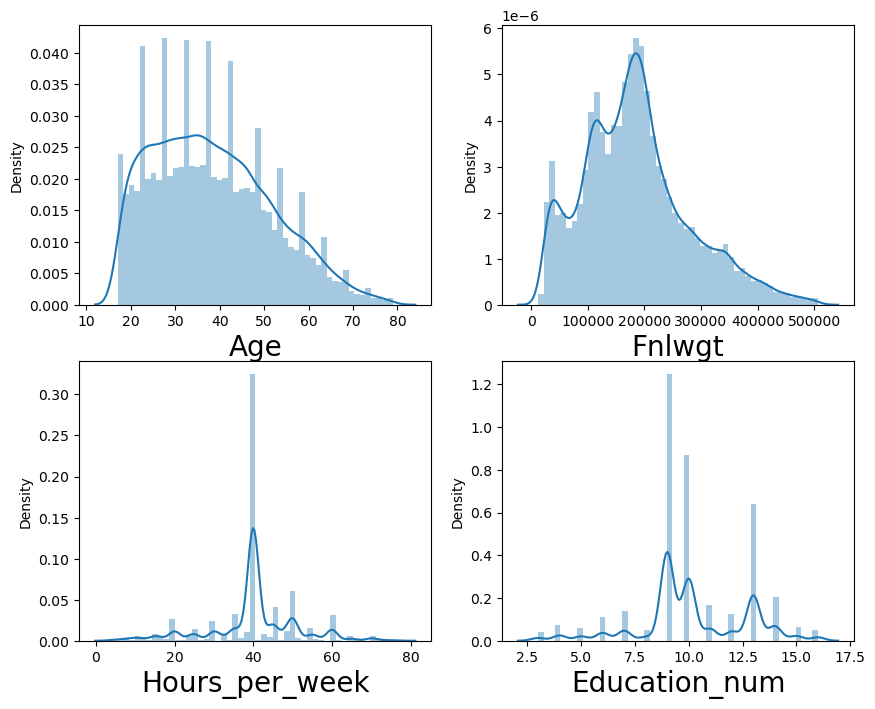

In [82]:
collist=['Age', 'Fnlwgt', 'Hours_per_week' , "Education_num"]
plt.figure(figsize=(10,8), facecolor='white')
plotnumber = 1

for column in df_new[collist]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Removing skewnes

In [83]:
from sklearn.preprocessing import PowerTransformer

In [84]:
collist = ['Age', 'Fnlwgt', 'Hours_per_week', 'Education_num']
pt = PowerTransformer(method='yeo-johnson')
df_new[collist] = pt.fit_transform(df_new[collist])
df_new[collist]

,Age,Fnlwgt,Hours_per_week,Education_num
0,0.915310,-1.114140,-2.229127,1.169227
1,0.109517,0.427172,-0.053590,-0.483542
2,1.092800,0.607262,-0.053590,-1.260420
3,-0.730374,1.487398,-0.053590,1.169227
4,0.033822,1.048787,-0.053590,1.600007
...,...,...,...,...
32555,-0.826519,0.812036,-0.235610,0.745056
32556,0.256394,-0.207319,-0.053590,-0.483542
32557,1.371920,-0.235046,-0.053590,-0.483542
32558,-1.352853,0.288781,-1.733088,-0.483542


### checking skewness after removal

In [85]:
df_new.skew().sort_values()

Native_country   -4.361860
Race             -2.453411
Workclass        -2.091085
Sex              -0.708659
Education        -0.273311
Marital_status   -0.185342
Fnlwgt           -0.034397
Age              -0.019688
Occupation        0.003014
Education_num     0.019811
Hours_per_week    0.107419
Relationship      0.777388
Income            1.205394
dtype: float64

### checking skewness after removal through data visualization using distplot

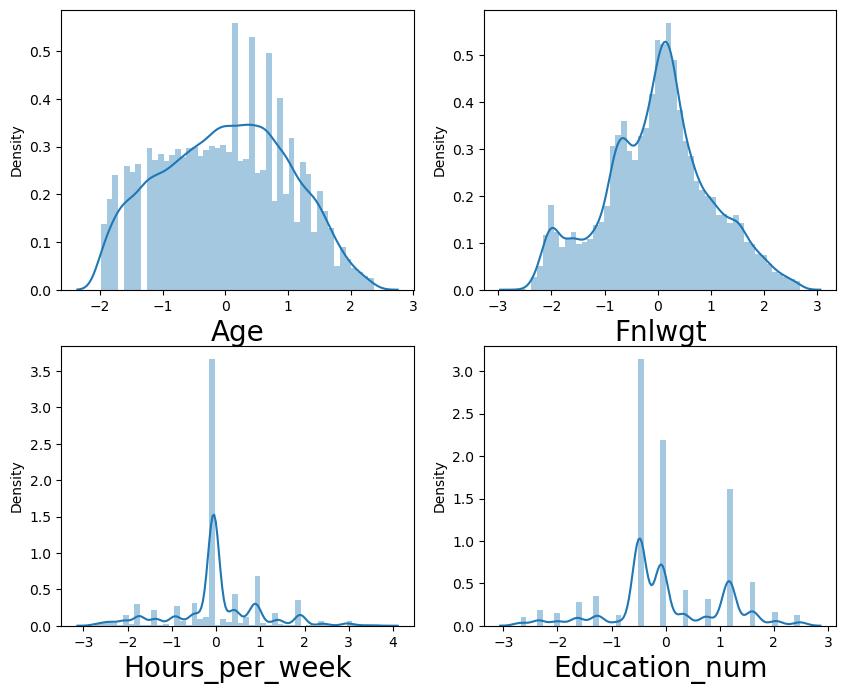

In [86]:
collist=['Age', 'Fnlwgt', 'Hours_per_week' , "Education_num"]
plt.figure(figsize=(10,8), facecolor='white')
plotnumber = 1

for column in df_new[collist]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has got removed compared to the old data.

## Data preprocessing

### Separating the features and label variables into x and y

In [87]:
x=df_new.drop("Income",axis=1)
y=df_new["Income"]

In [88]:
x.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country'],
      dtype='object')

In [89]:
x.shape,y.shape

((31437, 12), (31437,))

In [90]:
y.value_counts()

0    23832
1     7605
Name: Income, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

## Oversampling using the SMOTE

In [91]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [92]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [93]:
y.value_counts()

0    23832
1    23832
Name: Income, dtype: int64

After using oversampling method, we check that now our data is balanced.

<AxesSubplot:xlabel='Income', ylabel='count'>

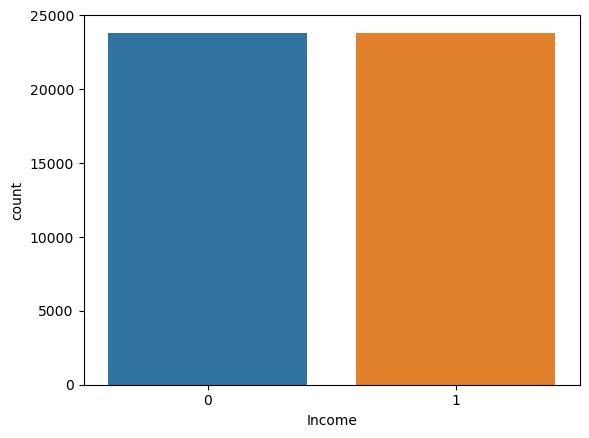

In [94]:
#checking through visualization also
sns.countplot(y)

Now, our data is balanced.

## Scaling data using Standard Scaler

In [95]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [96]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.815350,0.431623,-1.142872,1.191274,0.931115,-0.098438,-0.807288,-0.729324,0.364286,0.617418,-2.453193,0.246000
1,-0.059302,0.431623,0.441828,-1.317735,-0.673237,-1.685165,-0.303299,-0.118759,0.364286,0.617418,-0.198932,0.246000
2,1.008008,0.431623,0.626988,0.187670,-1.427357,-0.098438,-0.303299,-0.729324,-2.088334,0.617418,-0.198932,0.246000
3,-0.970968,0.431623,1.531900,1.191274,0.931115,-0.098438,0.704680,2.323500,-2.088334,-1.619648,-0.198932,-5.514004
4,-0.141467,0.431623,1.080942,-0.314132,1.349276,-0.098438,-0.807288,2.323500,0.364286,-1.619648,-0.198932,0.246000


## Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

## SelectKBest method

In [97]:
from sklearn.feature_selection import  SelectKBest, f_classif

In [98]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [99]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(12,'Score'))

           Feature        Score
4    Education_num  8645.308164
0              Age  6475.064144
7     Relationship  4651.875543
10  Hours_per_week  4259.325833
9              Sex  3359.114950
5   Marital_status  1275.165236
1        Workclass   452.404820
3        Education   438.970222
8             Race   345.856885
6       Occupation    73.024352
11  Native_country    19.694577
2           Fnlwgt     1.367810


Selecting the best features based on above scores, we can see that the column "Fnlwgt" has most lowest features for the prediction, so we will drop this column.

In [100]:
x = x.drop([ "Fnlwgt"],axis=1)

In [101]:
x.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Hours_per_week',
       'Native_country'],
      dtype='object')

Now, we have completed features selection process through using 2 techniques. So, will check for multicolinearity now.

## Checking for Multicolinearity

### VIF (Variance Inflation factor)

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.455375,Age
1,1.047861,Workclass
2,1.098767,Education
3,1.201722,Education_num
4,1.340291,Marital_status
5,1.015102,Occupation
6,1.981108,Relationship
7,1.044264,Race
8,1.859473,Sex
9,1.154919,Hours_per_week


__No Multi-collinearaity is present in columns. So, we will create model now.__

# Creating Model

#### Finding the best random state among all the models

In [107]:
models=[RandomForestClassifier(),DecisionTreeClassifier()]

In [108]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.8604195804195804 on Random State: 45


In [110]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [111]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state=45)

In [114]:
x.shape, y.shape

((47664, 11), (47664,))

In [115]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((33364, 11), (33364,), (14300, 11), (14300,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. We will understand this by Classification problem.

## Models with their metrics

In [113]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    cvs=cross_val_score(m,x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*'*100)

 For GaussianNB()  Accuracy score is:  0.7755944055944056

 Confusion matrix: 
 [[5386 1750]
 [1459 5705]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      7136
           1       0.77      0.80      0.78      7164

    accuracy                           0.78     14300
   macro avg       0.78      0.78      0.78     14300
weighted avg       0.78      0.78      0.78     14300

Cross Validation Score= 0.7694906013472911 

****************************************************************************************************
 For LogisticRegression()  Accuracy score is:  0.7533566433566433

 Confusion matrix: 
 [[5281 1855]
 [1672 5492]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      7136
           1       0.75      0.77      0.76      7164

    accuracy                           0.75     14300
   macro avg       0.75      0.75

### so, RandomForestClassifier()  getting best score in Accuracy: 85.90%

### Confusion Matrix for RFC

Text(0.5, 1.0, 'RFC prediction Confusion_matrix')

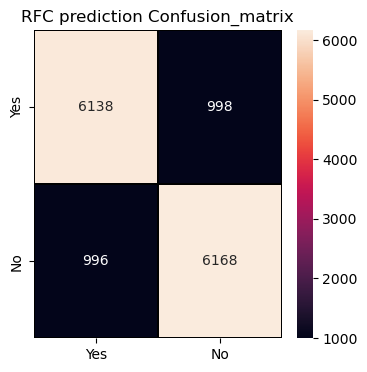

In [117]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

cm = confusion_matrix(y_test,pred_rfc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("RFC prediction Confusion_matrix")

## Hyper parameter tuning for best model using GridsearchCV

In [118]:
from sklearn.metrics import make_scorer, precision_score, recall_score

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 45)
rfc=RandomForestClassifier(random_state=30)
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,20,50),
      'criterion':['gini','entropy']}
gss=GridSearchCV(rfc,param,cv=5)
gss.fit(x_train,y_train)
gss.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto'}

In [121]:
final_model=RandomForestClassifier(random_state=45, max_features='auto', max_depth=20, criterion='entropy')
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 86.65734265734267


### after hyper parameter tuning , accuracy will raise to 86.66%

## ROC-AUC Curve

In [122]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error

In [127]:
fpr, tpr, threshold = roc_curve(y_test,fmod_pred)
auc = roc_auc_score(y_test,fmod_pred)

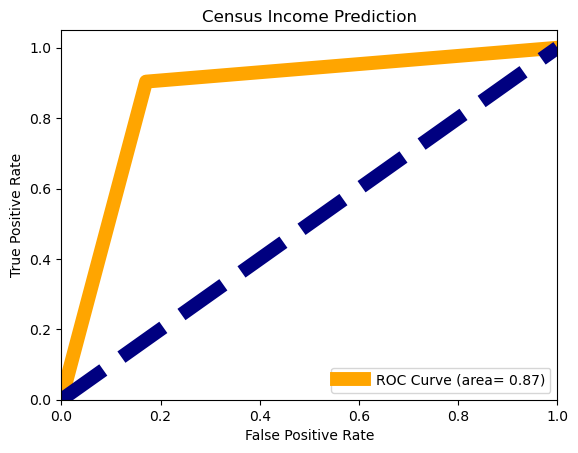

In [128]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Census Income Prediction")
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.87.

In general, an ROC-AUC of 0.5 suggests no discrimination , 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding. now our curve is in excellent

In [132]:
x.head(3)

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.815350,0.431623,1.191274,0.931115,-0.098438,-0.807288,-0.729324,0.364286,0.617418,-2.453193,0.246
1,-0.059302,0.431623,-1.317735,-0.673237,-1.685165,-0.303299,-0.118759,0.364286,0.617418,-0.198932,0.246
2,1.008008,0.431623,0.187670,-1.427357,-0.098438,-0.303299,-0.729324,-2.088334,0.617418,-0.198932,0.246


In [133]:
df.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,1,83311,5,13,1,3,0,4,1,13,38,0
1,38,1,215646,0,9,0,5,1,4,1,40,38,0
2,53,1,234721,3,7,1,5,0,2,1,40,38,0


### BULDING THE PREDICTION SYSTEM

In [139]:
input_data = (50,1,5,13,1,3,0,4,1,13,38)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = final_model.predict(input_data_reshaped)
print("Predicted Census_Income:",str(prediction))

Predicted Census_Income: [0]


### getting right prediction. so let's save the model

# Saving the trained model

In [142]:
# Saving the model using .pkl
import pickle
joblib.dump(final_model,"Census_Income_Prediction.pkl")

['Census_Income_Prediction.pkl']

In [143]:
hs= joblib.load(open('Census_Income_Prediction.pkl', 'rb'))
result = hs.score(x_test, y_test)*100
print(result)

86.65734265734267


In [144]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))
df_com.head(10)

,original,predicted
0,1,0
1,0,0
2,0,0
3,0,0
4,1,1
5,1,1
6,0,1
7,1,0
8,1,1
9,0,0


#### the above results shows that 86.65% results were predicted accurately as per the model.

In [149]:
model =df_com.to_csv('Census_Income_Prediction.csv')
model

__Model Prediction saved in CSV format__

# thank you